In [399]:
library(data.table)
library(ggplot2)
library(scales)
library(dplyr)
library(tidyr)
library(glue)
library(repr)

In [2]:
mu_df = fread("both_methods_all_keys_mutation_rates.csv")
gammas_df = fread("gammas.csv")

In [3]:
mu_df = mu_df %>%
            pivot_wider(
                names_from = method,
                names_prefix = "rate_",
                values_from = rate
            ) %>%
            filter(!is.na(rate_variant))

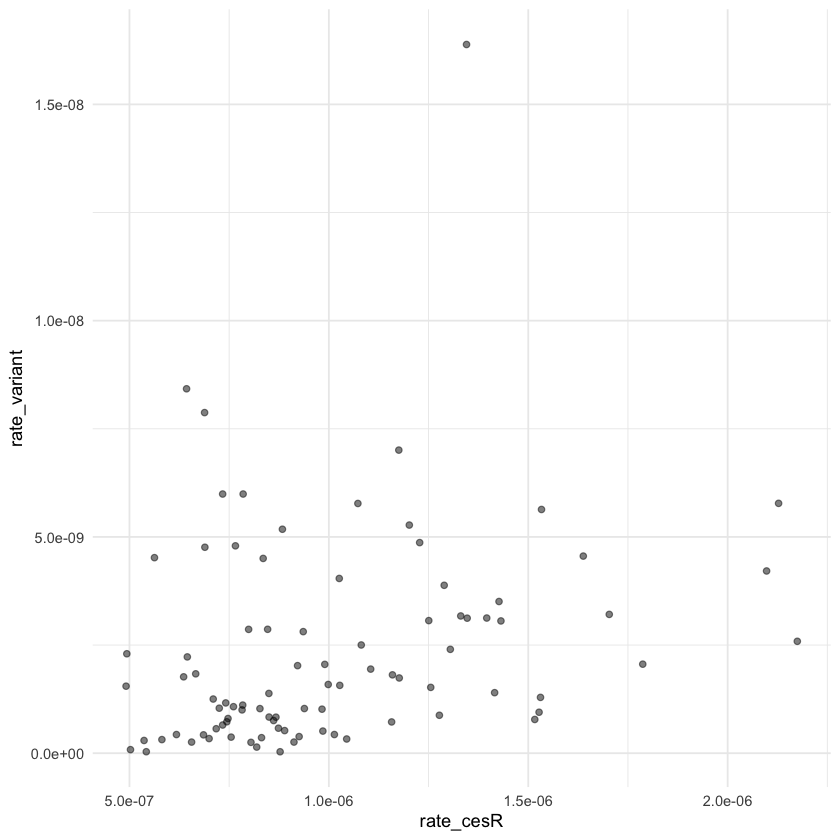

In [4]:
mu_df %>%
    filter(key =="nonsmoking") %>%
    filter(rate_variant < 4e-8) %>%
    ggplot(aes(x = rate_cesR, y = rate_variant)) + 
        geom_point(alpha=0.5) +
        # scale_x_continuous(trans='log') +
        # scale_y_continuous(trans='log') +
        #geom_smooth(method="lm",se=FALSE) +
        theme_minimal()

In [5]:
tmp = mu_df %>%
    filter(key =="nonsmoking")

cor.test(log(tmp$rate_variant), log(tmp$rate_cesR), alternative="two.sided", method="pearson")


	Pearson's product-moment correlation

data:  log(tmp$rate_variant) and log(tmp$rate_cesR)
t = 3.8683, df = 89, p-value = 0.0002083
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1881359 0.5429079
sample estimates:
      cor 
0.3793814 


The cesR and variant-based rates are correlated, but much more weakly for nonsmoking rates. Highly correlted for smoking rates.

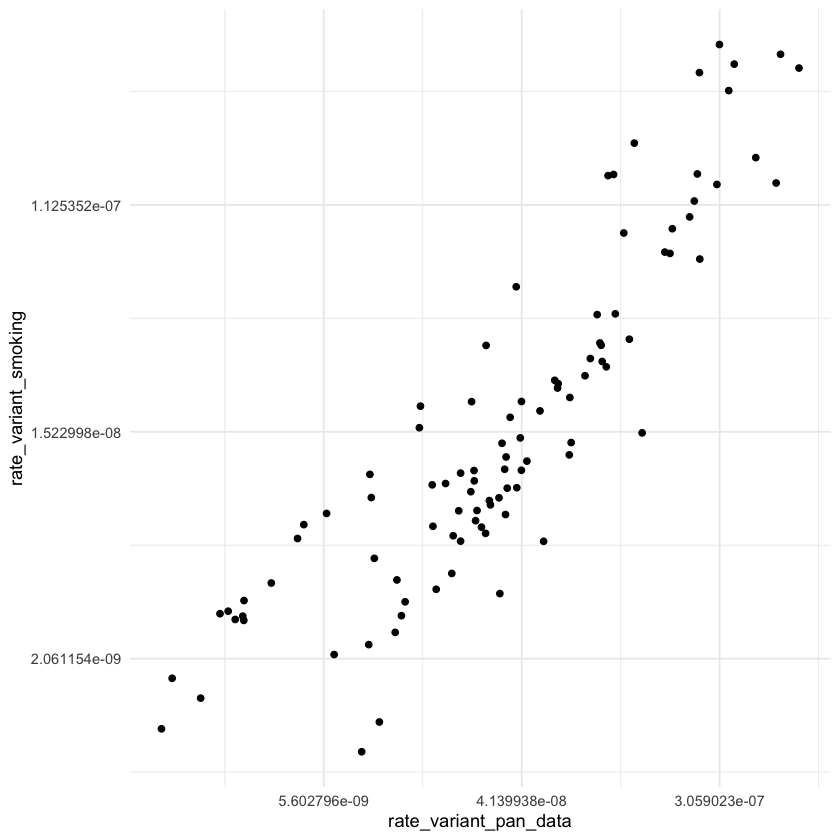

In [6]:
mu_df %>% 
    pivot_wider(
        names_from = key,
        values_from = c(rate_cesR, rate_variant)
    ) %>%
    ggplot(aes(x=rate_variant_pan_data, rate_variant_smoking)) +
        geom_point() +
        scale_x_continuous(trans='log') +
        scale_y_continuous(trans='log') +
        #geom_smooth(method=lm) +
        theme_minimal()

The smoking and nonsmoking rates are both correlated with the pan_data rates which is encouraging.

Warning message:
"Removed 19 rows containing missing values (`geom_point()`)."


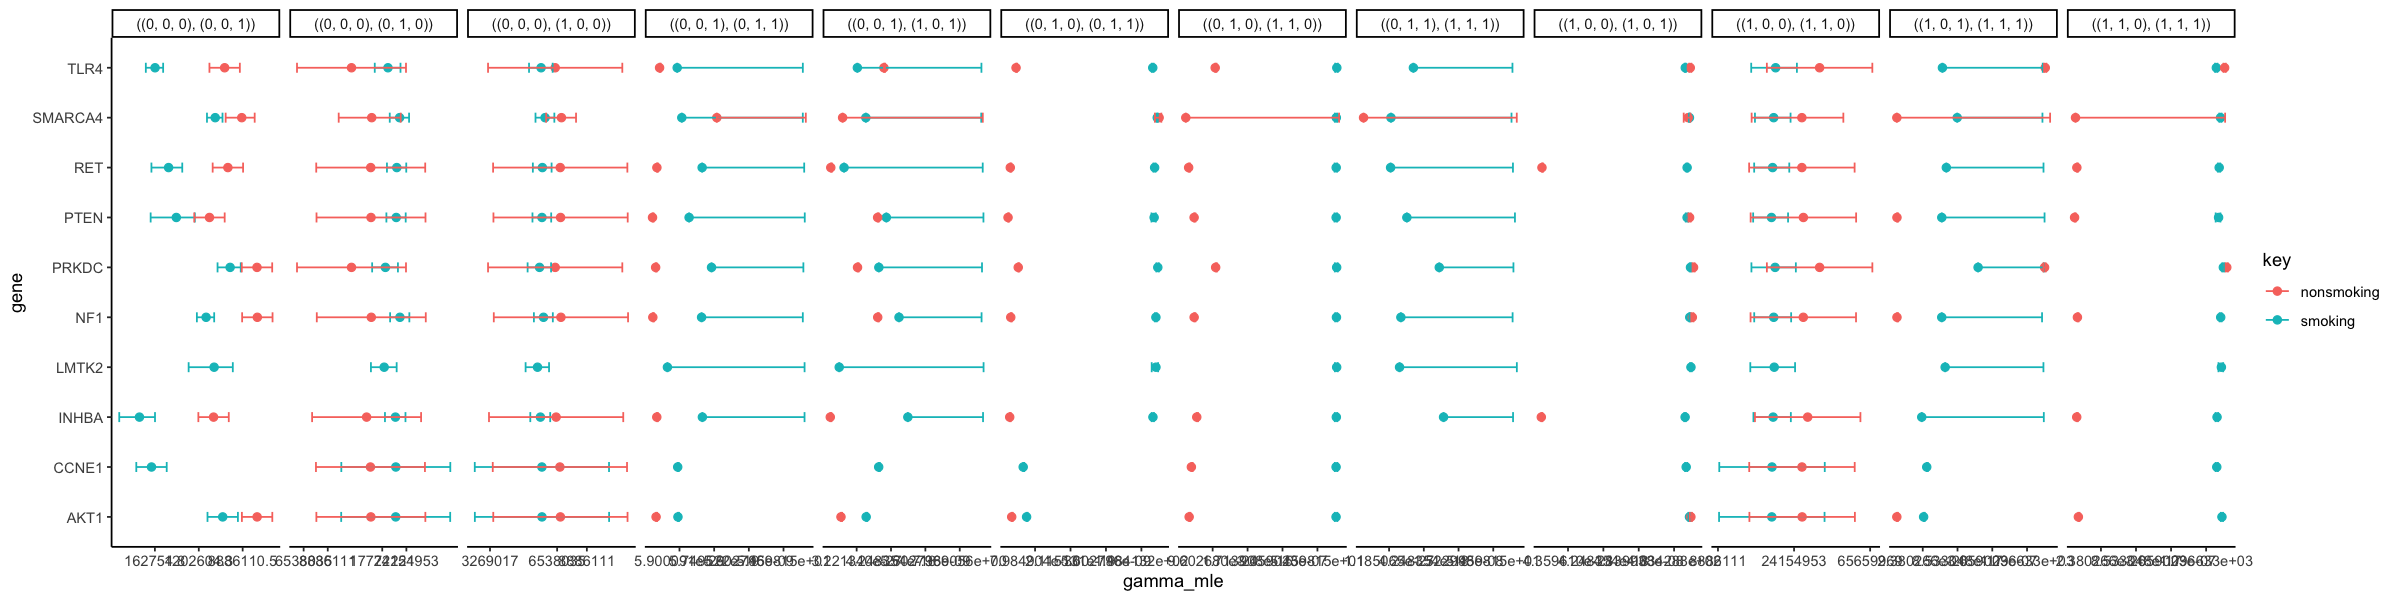

In [174]:
options(repr.plot.width = 20, repr.plot.height = 5)

gammas_df %>%
    filter(method=="variant") %>%
    filter(key!="pan_data") %>%
    filter(gene %in% (gammas_df %>% pull(gene) %>% unique %>% sample(10))) %>%
    ggplot(aes(x=gene,y=gamma_mle)) +
        geom_point(aes(color=key), size=2) +
        geom_errorbar(aes(ymin = gamma_ci_low, ymax = gamma_ci_high, color=key),
                        width=0.2) +
        #geom_abline(xintercept=1, col="gray", lty=2) +
        scale_y_continuous(trans="log") +
        coord_flip() + 
        facet_grid(cols=vars(mutation),
                    scales="free") +
        theme_classic()

In [268]:
gammas_df %>%
    filter(method=="variant") %>%
    filter(key!="pan_data") %>%
    filter(gene %in% (gammas_df %>% pull(gene) %>% unique %>% sample(10)))

method,key,gene,mutation,gamma_mle,gamma_ci_low,gamma_ci_high
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
variant,smoking,MET,"((0, 0, 0), (0, 0, 1))",2.268472e+06,1.353057e+06,3526646
variant,smoking,MET,"((0, 0, 0), (0, 1, 0))",2.149586e+07,1.896194e+07,24253973
variant,smoking,MET,"((0, 0, 1), (0, 1, 1))",6.659196e-25,6.659196e-25,24928578
variant,smoking,MET,"((0, 1, 0), (0, 1, 1))",3.488934e+06,1.496274e+06,6768871
variant,smoking,MET,"((0, 0, 0), (1, 0, 0))",5.703195e+06,5.170591e+06,6272672
variant,smoking,MET,"((0, 0, 1), (1, 0, 1))",3.324274e-23,3.324274e-23,4090439
variant,smoking,MET,"((1, 0, 0), (1, 0, 1))",2.313970e+06,9.930315e+05,4484668
variant,smoking,MET,"((0, 1, 0), (1, 1, 0))",1.379763e+06,5.534048e+05,2324158
variant,smoking,MET,"((1, 0, 0), (1, 1, 0))",1.807518e+07,1.425510e+07,22421869


In [214]:
gammas_df %>%
    filter(method=="variant") %>%
    filter(key!="pan_data") %>%
    filter(gene %in% (gammas_df %>% pull(gene) %>% unique %>% sample(10))) %>% 
    pivot_wider(
        names_from = key,
        values_from  = c(gamma_mle, gamma_ci_low, gamma_ci_high)
    ) %>%
    mutate(signif_diff = case_when(
            gamma_ci_low_smoking > gamma_ci_high_nonsmoking ~ "smoking_greater",
            gamma_ci_high_smoking < gamma_ci_low_nonsmoking ~ "smoking_less",
            is.na(gamma_mle_smoking) | is.na(gamma_mle_nonsmoking) ~ "null",
            .default = "no_signif_diff"
        )) %>%
    mutate(from = stringr::str_extract(mutation, "\\d, \\d, \\d(?=\\), )"),
           to = stringr::str_extract(mutation, "(?<=, \\()\\d, \\d, \\d"),
           mutated_gene = as.character(unlist(lapply(mutation, find_mutated_gene)))) %>%
    head()
    

method,gene,mutation,gamma_mle_smoking,gamma_mle_nonsmoking,gamma_ci_low_smoking,gamma_ci_low_nonsmoking,gamma_ci_high_smoking,gamma_ci_high_nonsmoking,signif_diff,from,to,mutated_gene
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
variant,RBM10,"((0, 0, 0), (0, 0, 1))",1.497101e+06,1.460051e+07,1.015465e+06,7.300257e+06,2112060,2.920103e+07,smoking_less,"0, 0, 0","0, 0, 1",3
variant,RBM10,"((0, 0, 0), (0, 1, 0))",2.177023e+07,1.568643e+07,1.920076e+07,7.843216e+06,24568330,3.137286e+07,no_signif_diff,"0, 0, 0","0, 1, 0",2
variant,RBM10,"((0, 0, 1), (0, 1, 1))",1.603763e-13,6.363810e-36,1.603763e-13,6.363810e-36,22873110,1.272762e-35,smoking_greater,"0, 0, 1","0, 1, 1",2
variant,RBM10,"((0, 1, 0), (0, 1, 1))",6.872354e+06,2.677472e-37,4.787007e+06,2.677472e-37,9514133,5.354944e-37,smoking_greater,"0, 1, 0","0, 1, 1",3
variant,RBM10,"((0, 0, 0), (1, 0, 0))",5.810075e+06,6.898911e+06,5.267501e+06,3.449456e+06,6389889,1.379782e+07,no_signif_diff,"0, 0, 0","1, 0, 0",1
variant,RBM10,"((0, 0, 1), (1, 0, 1))",9.353466e-33,1.624284e-25,9.353466e-33,1.624284e-25,3212260,3.248568e-25,no_signif_diff,"0, 0, 1","1, 0, 1",1


In [201]:
find_mutated_gene = function(mutation_indices){
    numeric_indices = as.integer(str_extract_all(mutation_indices,"\\d")[[1]])
    len = length(numeric_indices)
    mutated_index = which((numeric_indices[(len/2 + 1):len] - numeric_indices[1:(len/2)]) == 1)
    return(mutated_index)
}

In [177]:
plotting_df = gammas_df %>%
    filter(method=="variant") %>%
    filter(key!="pan_data") %>%
    filter(gene %in% (gammas_df %>% pull(gene) %>% unique %>% sample(10))) %>% 
    pivot_wider(
        names_from = key,
        values_from  = c(gamma_mle, gamma_ci_low, gamma_ci_high)
    ) %>%
    mutate(signif_diff = case_when(
            gamma_ci_low_smoking > gamma_ci_high_nonsmoking ~ "smoking_greater",
            gamma_ci_high_smoking < gamma_ci_low_nonsmoking ~ "smoking_less",
            is.na(gamma_mle_smoking) | is.na(gamma_mle_nonsmoking) ~ "null",
            .default = "no_signif_diff"
        )) %>%
    mutate(from = stringr::str_extract(mutation, "\\d, \\d, \\d(?=\\), )"),
           to = stringr::str_extract(mutation, "(?<=, \\()\\d, \\d, \\d"),
           mutated_gene = lapply(mutation, find_mutated_gene))

Warning message:
"Removed 2 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 15 rows containing missing values (`geom_point()`)."


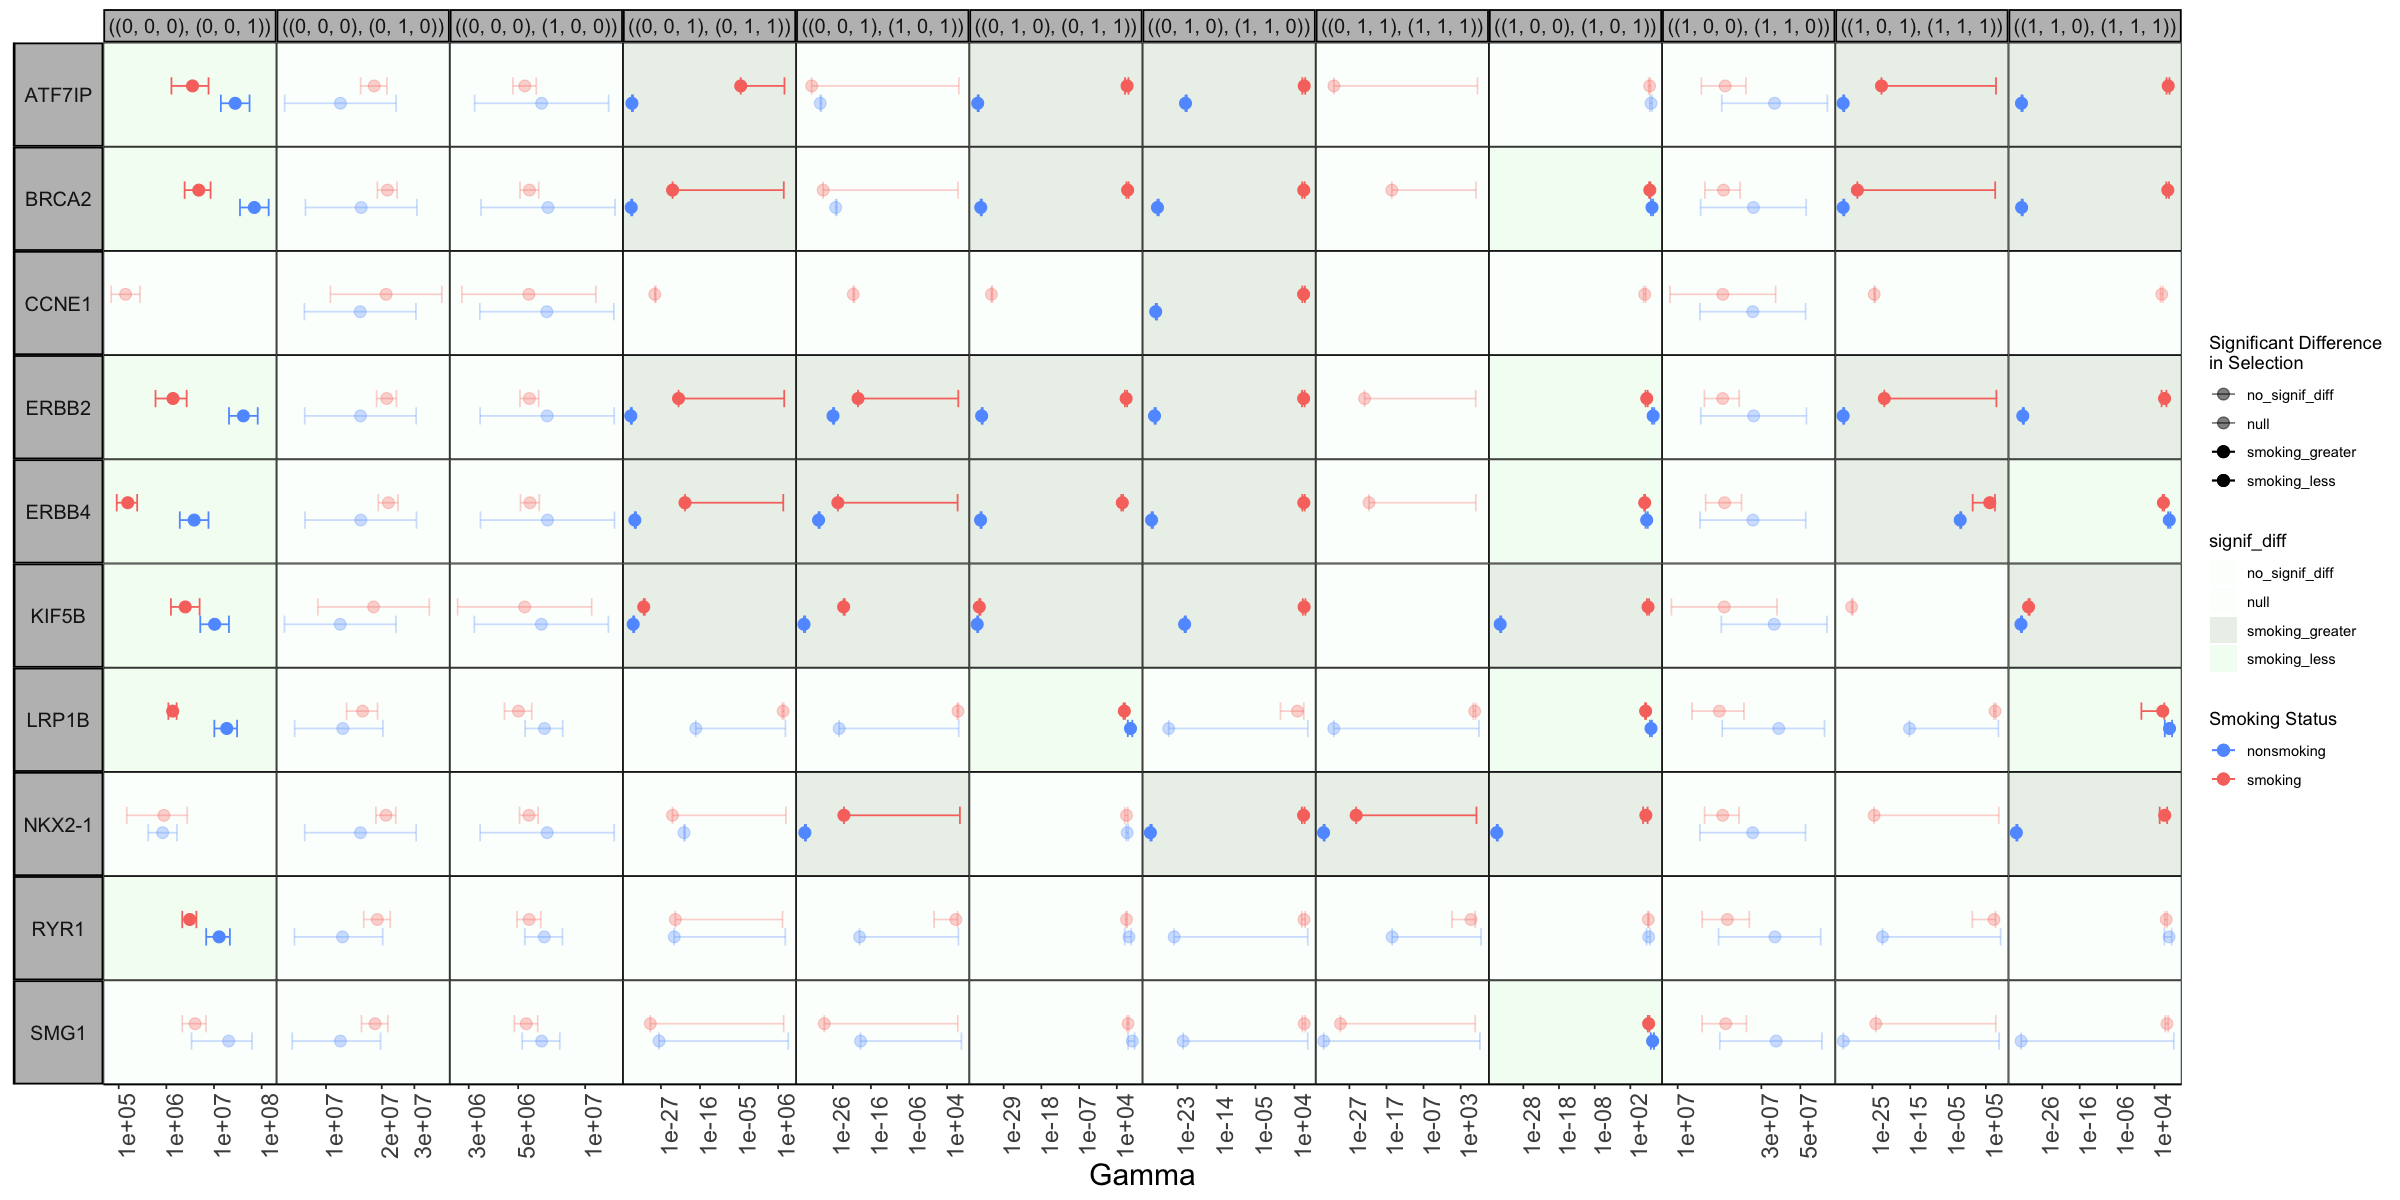

In [227]:
options(repr.plot.width = 20, repr.plot.height = 10)

color_palette =  c("smoking" = "#F8766D", "nonsmoking" = "#619CFF")
alpha_palette = c("smoking_greater" = 1, "smoking_less" = 1, "null" = 0.3, "no_signif_diff" = 0.3)
fill_palette = c("1" = "yellow", "2" = "orange", "3" = "red")
fill_palette = c("smoking_greater" = "darkgreen", "smoking_less" = "lightgreen", "null" = "#dcffdc", "no_signif_diff" = "#dcffdc")

gammas_df %>%
    filter(method=="variant") %>%
    filter(key!="pan_data") %>%
    filter(gene %in% (gammas_df %>% pull(gene) %>% unique %>% sample(10))) %>% 
    pivot_wider(
        names_from = key,
        values_from  = c(gamma_mle, gamma_ci_low, gamma_ci_high)
    ) %>%
    mutate(signif_diff = case_when(
            gamma_ci_low_smoking > gamma_ci_high_nonsmoking ~ "smoking_greater",
            gamma_ci_high_smoking < gamma_ci_low_nonsmoking ~ "smoking_less",
            is.na(gamma_mle_smoking) | is.na(gamma_mle_nonsmoking) ~ "null",
            .default = "no_signif_diff"
        )) %>%
    mutate(from = stringr::str_extract(mutation, "\\d, \\d, \\d(?=\\), )"),
           to = stringr::str_extract(mutation, "(?<=, \\()\\d, \\d, \\d"),
           mutated_gene = as.character(unlist(lapply(mutation, find_mutated_gene)))) %>%
    ggplot(aes(x=gene)) +
        # geom_rect(aes(fill = mutated_gene),xmin = -Inf,xmax = Inf,
        #     ymin = -Inf,ymax = Inf,alpha = 0.1) +
        geom_rect(aes(fill = signif_diff),xmin = -Inf,xmax = Inf,
            ymin = -Inf,ymax = Inf,alpha = 0.1) +
        geom_point(aes(y=gamma_mle_smoking,
                    color="smoking",
                    alpha=signif_diff),
                    size=3,
                    position = position_nudge(x=0.1)) +
        geom_point(aes(y=gamma_mle_nonsmoking, 
                    color="nonsmoking",
                    alpha=signif_diff),
                    size=3,
                    position = position_nudge(x=-0.1)) +
        geom_errorbar(aes(ymin = gamma_ci_low_smoking, ymax = gamma_ci_high_smoking,
                        color="smoking",
                    alpha=signif_diff),
                        width=0.2,
                        position = position_nudge(x=0.1)) +
        geom_errorbar(aes(ymin = gamma_ci_low_nonsmoking, ymax = gamma_ci_high_nonsmoking,
                        color="nonsmoking",
                        alpha=signif_diff),
                        width=0.2,
                        position = position_nudge(x=-0.1)) +
        #geom_hline(yintercept=1, col="gray", lty=2) +
        scale_y_log10(aes(name="Gamma",limits=c(min(gamma_ci_low),max(gamma_ci_high)))) +
        scale_color_manual(values = color_palette, name="Smoking Status") +
        scale_alpha_manual(values = alpha_palette, name="Significant Difference\nin Selection") +
        scale_fill_manual(values = fill_palette) +
        coord_flip() +
        facet_grid(cols=vars(mutation),
                    rows=vars(gene), switch = "y",
                    scales="free") +
        theme_classic() +
        theme(axis.title.y = element_blank(),
                axis.title.x = element_text(size = 18),
                axis.ticks.y = element_blank(),
                axis.text.y = element_blank(),
                axis.text.x = element_text(angle=90),
                axis.text = element_text(size=14),
                strip.background = element_rect(fill="gray"),
                strip.text = element_text(size = 12),
                strip.text.y.left = element_text(angle=0),
                panel.border = element_rect(color="#000000", fill=NA),
                panel.spacing = unit(0,"lines"))

In [470]:
s_plus_spc = fread("../../output/samples_per_combination_smoking_plus.csv")
ns_plus_spc = fread("../../output/samples_per_combination_nonsmoking_plus.csv")

s_plus_spc = s_plus_spc %>% 
                pivot_longer(cols=starts_with("("),
                                names_to = "state",
                                values_to = "count") %>%
                mutate(state = gsub("[()]","",state)) %>% 
                mutate(key = "smoking")

ns_plus_spc = ns_plus_spc %>% 
                pivot_longer(cols=starts_with("("),
                                names_to = "state",
                                values_to = "count") %>%
                mutate(state = gsub("[()]","",state)) %>%
                mutate(key = "nonsmoking")

samples_per_combination = bind_rows(s_plus_spc, ns_plus_spc)

In [479]:
gammas_df %>%
    filter(method=="variant") %>%
    filter(key!="pan_data") %>%
    filter(gene %in% (gammas_df %>% pull(gene) %>% unique %>% sample(20,))) %>% 
    mutate(from = stringr::str_extract(mutation, "\\d, \\d, \\d(?=\\), )"),
           to = stringr::str_extract(mutation, "(?<=, \\()\\d, \\d, \\d"),
           mutated_gene = as.character(unlist(lapply(mutation, find_mutated_gene)))) %>%
    left_join(samples_per_combination, by=c("key"="key", "gene"="third gene", 
                                          "from"="state")) %>%
       rename(from_count = count) %>%
    left_join(samples_per_combination, by=c("key"="key", "gene"="third gene", 
                                          "to"="state")) %>%
       rename(to_count = count) %>%
    pivot_wider(
        names_from = key,
        values_from  = c(gamma_mle, gamma_ci_low, gamma_ci_high, from_count, to_count)
    ) %>%
    mutate(signif_diff = case_when(
            gamma_ci_low_smoking > gamma_ci_high_nonsmoking ~ "smoking_greater",
            gamma_ci_high_smoking < gamma_ci_low_nonsmoking ~ "smoking_less",
            is.na(gamma_mle_smoking) | is.na(gamma_mle_nonsmoking) ~ "null",
            .default = "no_signif_diff"
        )) %>%
    mutate(logratio = log(gamma_mle_smoking/gamma_mle_nonsmoking))
    
    

method,gene,mutation,from,to,mutated_gene,gamma_mle_smoking,gamma_mle_nonsmoking,gamma_ci_low_smoking,gamma_ci_low_nonsmoking,gamma_ci_high_smoking,gamma_ci_high_nonsmoking,from_count_smoking,from_count_nonsmoking,to_count_smoking,to_count_nonsmoking,signif_diff,logratio
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<dbl>
variant,BRAF,"((0, 0, 0), (0, 0, 1))","0, 0, 0","0, 0, 1",3,5.121806e+06,2.016797e+07,3.498374e+06,1.008398e+07,7187121,4.033594e+07,283,242,30,15,smoking_less,-1.3705885
variant,BRAF,"((0, 0, 0), (0, 1, 0))","0, 0, 0","0, 1, 0",2,2.213623e+07,1.571550e+07,1.953098e+07,7.857752e+06,24972464,3.143101e+07,283,242,255,25,no_signif_diff,0.3425679
variant,BRAF,"((0, 0, 1), (0, 1, 1))","0, 0, 1","0, 1, 1",2,9.781575e-29,2.366984e-36,9.781575e-29,2.366984e-36,13294599,4.733968e-36,30,15,5,0,smoking_greater,17.5369796
variant,BRAF,"((0, 1, 0), (0, 1, 1))","0, 1, 0","0, 1, 1",3,3.085194e+06,3.577541e-37,1.104677e+06,3.577541e-37,6649066,7.155082e-37,255,25,5,0,smoking_greater,98.8630979
variant,BRAF,"((0, 0, 0), (1, 0, 0))","0, 0, 0","1, 0, 0",1,5.762650e+06,6.911706e+06,5.220839e+06,3.455853e+06,6342475,1.382341e+07,283,242,337,149,no_signif_diff,-0.1818190
variant,BRAF,"((0, 0, 1), (1, 0, 1))","0, 0, 1","1, 0, 1",1,1.031073e-19,7.123701e-21,1.031073e-19,7.123701e-21,3654706,1.424740e-20,30,15,34,5,smoking_greater,2.6723432
variant,BRAF,"((1, 0, 0), (1, 0, 1))","1, 0, 0","1, 0, 1",3,1.474301e+07,2.636244e+07,1.029094e+07,1.318122e+07,20361151,5.272488e+07,337,149,34,5,no_signif_diff,-0.5811712
variant,BRAF,"((0, 1, 0), (1, 1, 0))","0, 1, 0","1, 1, 0",1,1.511381e+06,4.348739e-28,6.915192e+05,4.348739e-28,2447784,8.697479e-28,255,25,124,11,smoking_greater,77.2310310
variant,BRAF,"((1, 0, 0), (1, 1, 0))","1, 0, 0","1, 1, 0",2,1.820814e+07,2.711601e+07,1.423531e+07,1.355801e+07,22731573,5.423203e+07,337,149,124,11,no_signif_diff,-0.3982557


In [471]:
#set.seed(1)

options(repr.plot.width = 20, repr.plot.height = 20)

color_palette =  c("smoking" = "#F8766D", "nonsmoking" = "#619CFF")
alpha_palette = c("smoking_greater" = 1, "smoking_less" = 1, "null" = 0.3, "no_signif_diff" = 0.3)
#fill_palette = c("1" = "yellow", "2" = "orange", "3" = "red")
#fill_palette = c("smoking_greater" = "darkgreen", "smoking_less" = "lightgreen", "null" = "#dcffdc", "no_signif_diff" = "#dcffdc")

gammas_df %>%
    filter(method=="variant") %>%
    filter(key!="pan_data") %>%
    filter(gene %in% (gammas_df %>% pull(gene) %>% unique %>% sample(20,))) %>% 
    pivot_wider(
        names_from = key,
        values_from  = c(gamma_mle, gamma_ci_low, gamma_ci_high)
    ) %>%
    mutate(signif_diff = case_when(
            gamma_ci_low_smoking > gamma_ci_high_nonsmoking ~ "smoking_greater",
            gamma_ci_high_smoking < gamma_ci_low_nonsmoking ~ "smoking_less",
            is.na(gamma_mle_smoking) | is.na(gamma_mle_nonsmoking) ~ "null",
            .default = "no_signif_diff"
        )) %>%
    mutate(from = stringr::str_extract(mutation, "\\d, \\d, \\d(?=\\), )"),
           to = stringr::str_extract(mutation, "(?<=, \\()\\d, \\d, \\d"),
           mutated_gene = as.character(unlist(lapply(mutation, find_mutated_gene)))) %>%
    mutate(logratio = log(gamma_mle_smoking/gamma_mle_nonsmoking)) %>%

    #filter(!(is.na(gamma_mle_smoking) | is.na(gamma_mle_nonsmoking))) %>%

    left_join(samples_per_combination, by=c("key"="key", "gene"="third gene", 
                                          "from"="state")) %>%
       rename(from_count = count) %>%
    left_join(samples_per_combination, by=c("key"="key", "gene"="third gene", 
                                          "to"="state")) %>%
       rename(to_count = count) %>%
    ggplot(aes(x=gene)) +
        # geom_rect(aes(fill = mutated_gene),xmin = -Inf,xmax = Inf,
        #     ymin = -Inf,ymax = Inf,alpha = 0.1) +
        geom_rect(aes(fill = logratio),xmin = -Inf,xmax = Inf,
            ymin = -Inf,ymax = Inf,alpha = 0.1) +
        geom_point(aes(y=gamma_mle_smoking,
                    color="smoking",
                    alpha=signif_diff),
                    size=3,
                    position = position_nudge(x=0.1)) +
        geom_point(aes(y=gamma_mle_nonsmoking, 
                    color="nonsmoking",
                    alpha=signif_diff),
                    size=3,
                    position = position_nudge(x=-0.1)) +
        geom_errorbar(aes(ymin = gamma_ci_low_smoking, ymax = gamma_ci_high_smoking,
                        color="smoking",
                    alpha=signif_diff),
                        width=0.2,
                        position = position_nudge(x=0.1)) +
        geom_errorbar(aes(ymin = gamma_ci_low_nonsmoking, ymax = gamma_ci_high_nonsmoking,
                        color="nonsmoking",
                        alpha=signif_diff),
                        width=0.2,
                        position = position_nudge(x=-0.1)) +
        # geom_hline(yintercept=1, col="gray", lty=2) +
        scale_y_log10(aes(name="Gamma",limits=c(min(gamma_ci_low),max(gamma_ci_high)))) +
        scale_color_manual(values = color_palette, name="Smoking Status") +
        scale_alpha_manual(values = alpha_palette, name="Significant Difference\nin Selection") +
        scale_fill_gradient2(low = muted("blue"), mid = "white", high = muted("red"),na.value = "white", name="log Ratio of Selection\n(Smoking/Non)") + 
        # scale_fill_continuous(low="red",mid="white",high="blue", name="Selection Difference\n(Smoking-Non)") +
        # scale_fill_manual(values = fill_palette) +
        coord_flip() +
        facet_grid(cols=vars(mutation),
                    rows=vars(gene), switch = "y",
                    scales="free") +
        theme_classic() +
        theme(axis.title.y = element_blank(),
                axis.title.x = element_text(size = 18),
                axis.ticks.y = element_blank(),
                axis.text.y = element_blank(),
                axis.text.x = element_text(angle=90),
                axis.text = element_text(size=14),
                strip.background = element_rect(fill="gray"),
                strip.text = element_text(size = 12),
                strip.text.y.left = element_text(angle=0),
                panel.border = element_rect(color="#000000", fill=NA),
                panel.spacing = unit(0,"lines"))

ERROR: [1m[33mError[39m in `left_join()`:[22m
[1m[22m[33m![39m Join columns in `x` must be present in the data.
[31mx[39m Problem with `key`.


Warning message:
"Removed 260 rows containing non-finite values (`stat_bin()`)."


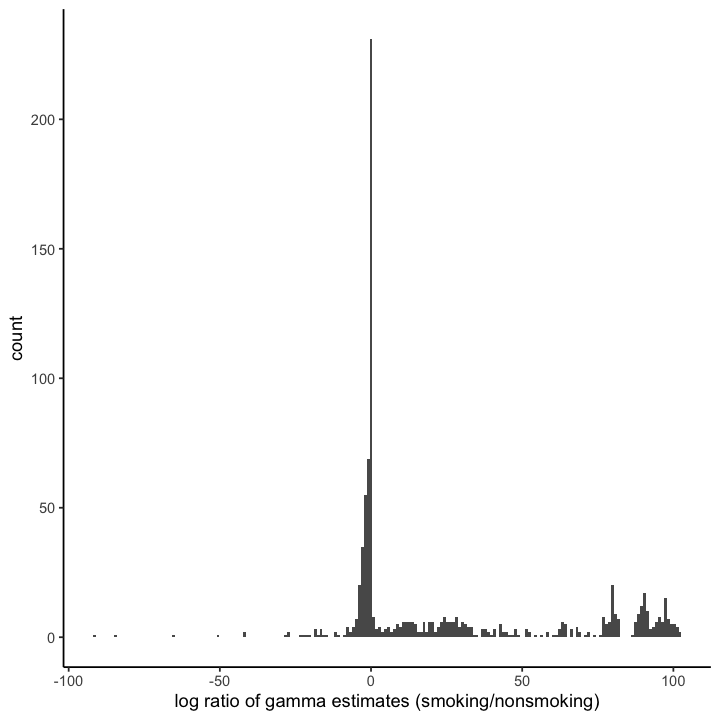

In [378]:
options(repr.plot.width = 6, repr.plot.height = 6)

gammas_df %>%
    filter(method=="variant") %>%
    filter(key!="pan_data") %>%
    #filter(gene %in% (gammas_df %>% pull(gene) %>% unique %>% sample(10))) %>% 
    pivot_wider(
        names_from = key,
        values_from  = c(gamma_mle, gamma_ci_low, gamma_ci_high)
    ) %>%
    mutate(s_ns_diff = gamma_mle_smoking-gamma_mle_nonsmoking,
            #logdiff = log(gamma_mle_smoking-gamma_mle_nonsmoking),
            logratio = log(gamma_mle_smoking/gamma_mle_nonsmoking)) %>%
    # summarize(median = median(logratio,na.rm=T), avg = mean(logratio,na.rm=T))
    ggplot(aes(x=logratio)) +
        geom_histogram(bins = 200) +
        labs(x="log ratio of gamma estimates (smoking/nonsmoking)") + 
        theme_classic()
        # geom_density(bw=1e-1) + 
        #xlim(-1e8, 1e8)

Warning message:
"Removed 260 rows containing non-finite values (`stat_bin()`)."


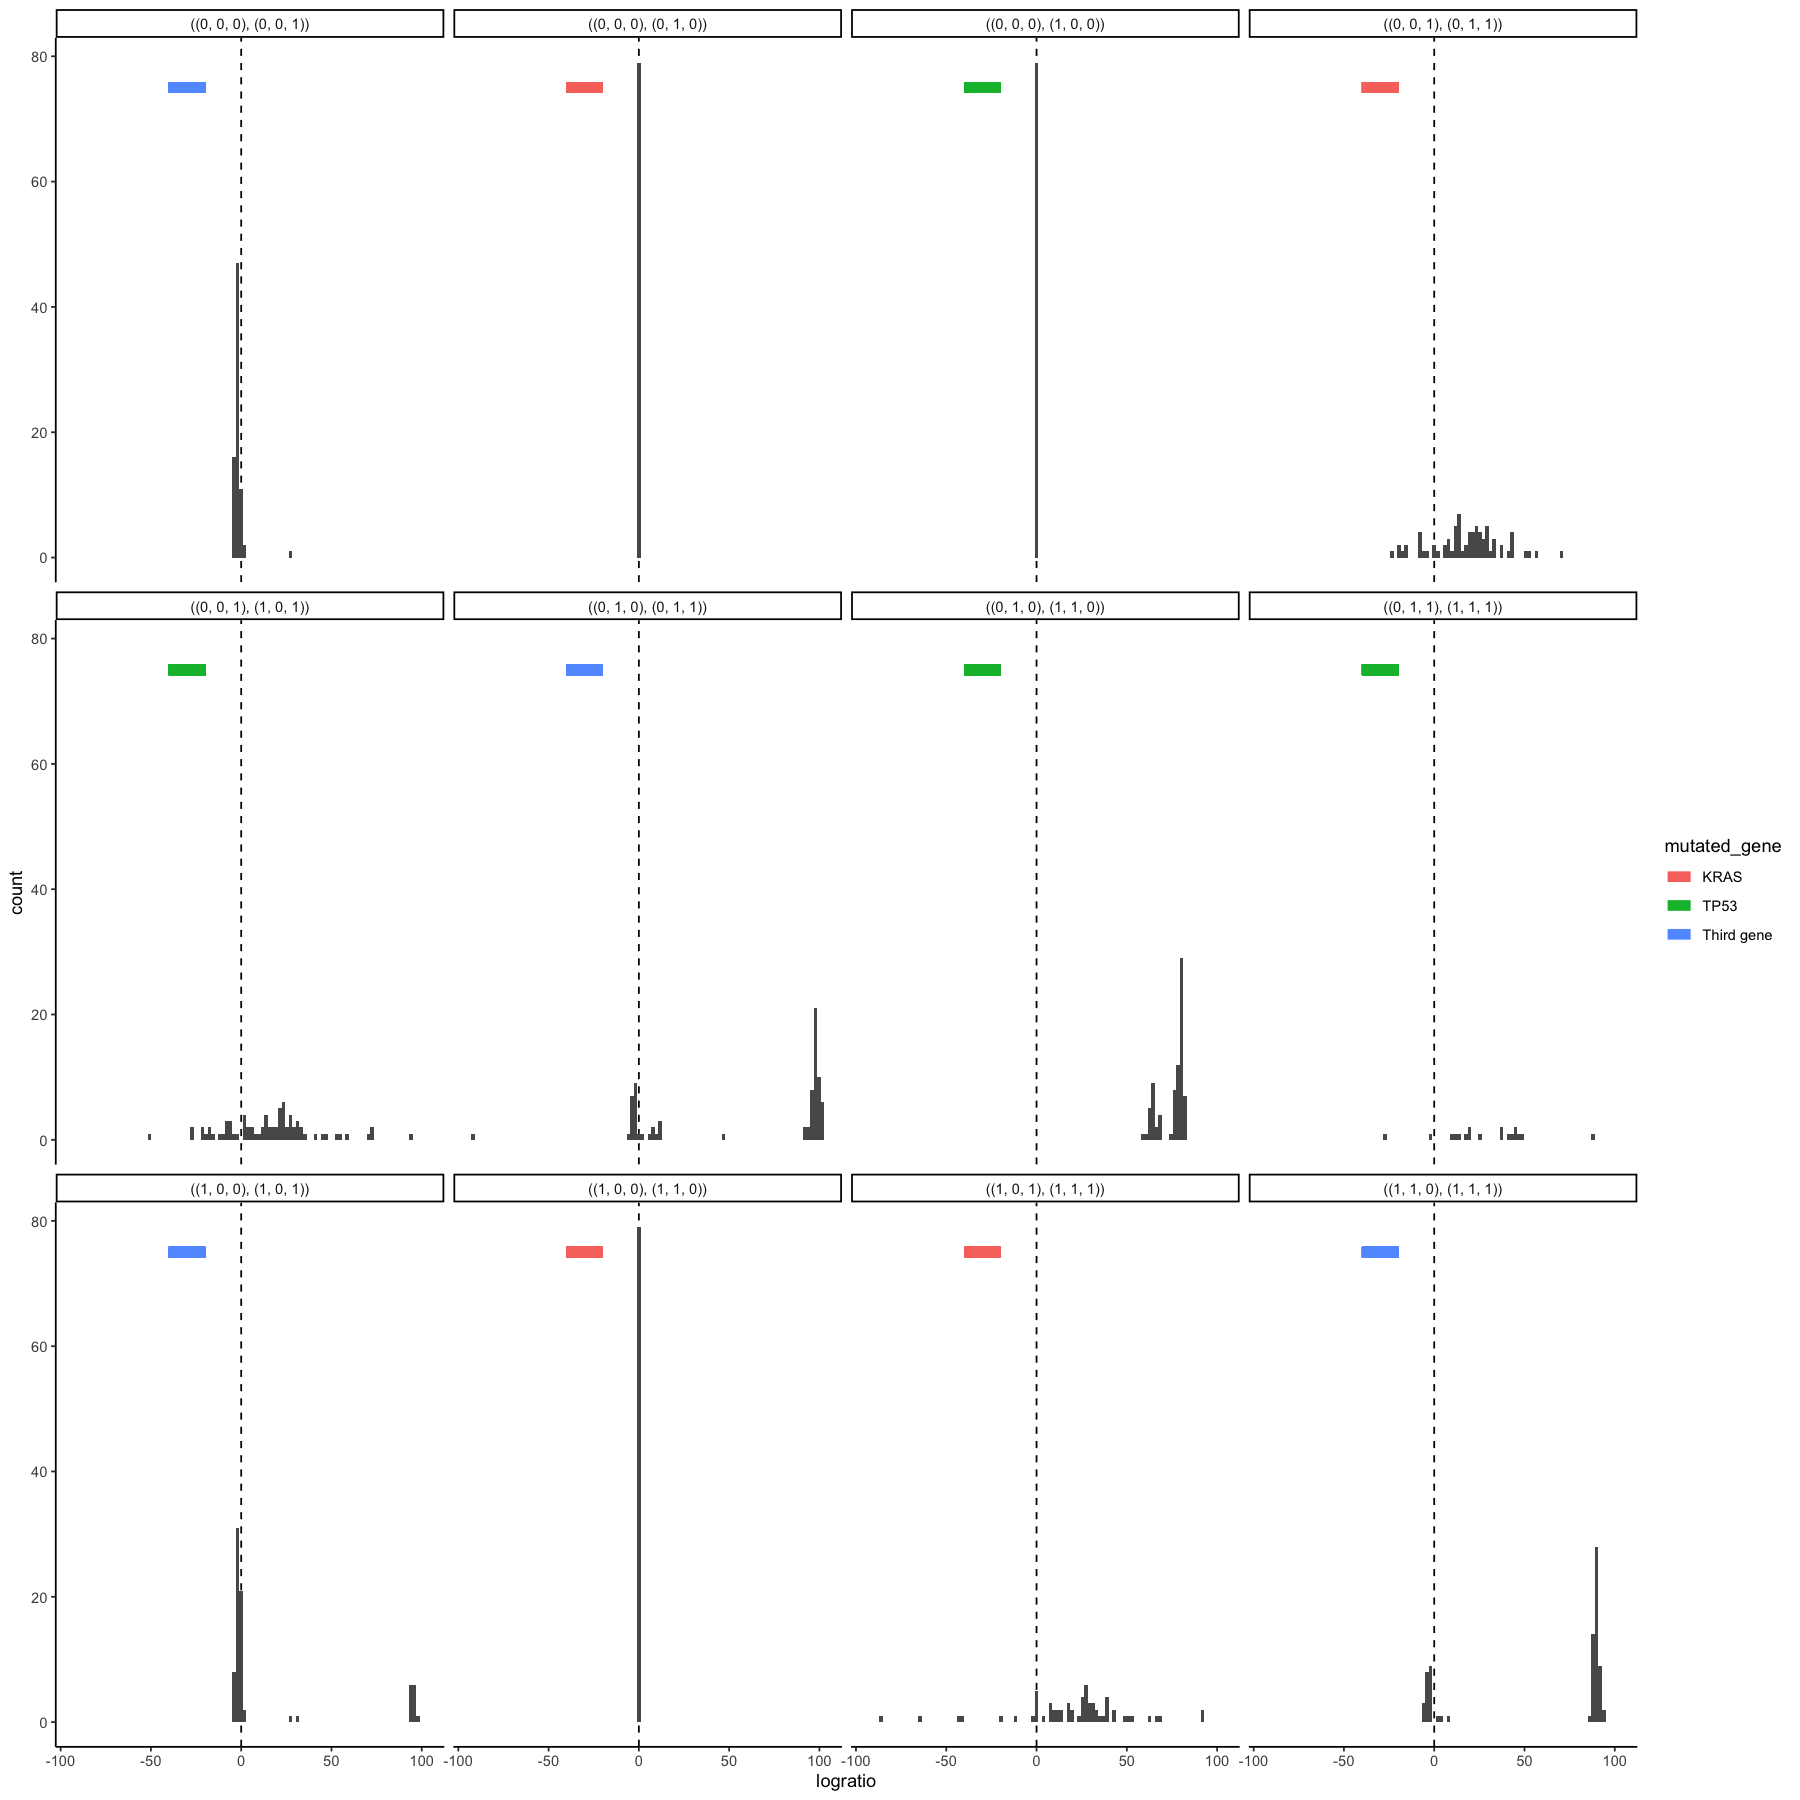

In [379]:
options(repr.plot.width = 15, repr.plot.height = 15)

gammas_df %>%
    filter(method=="variant") %>%
    filter(key!="pan_data") %>%
    #filter(gene %in% (gammas_df %>% pull(gene) %>% unique %>% sample(10))) %>% 
    pivot_wider(
        names_from = key,
        values_from  = c(gamma_mle, gamma_ci_low, gamma_ci_high)
    ) %>%
    mutate(s_ns_diff = gamma_mle_smoking-gamma_mle_nonsmoking,
            #logdiff = log(gamma_mle_smoking-gamma_mle_nonsmoking),
            logratio = log(gamma_mle_smoking/gamma_mle_nonsmoking)) %>%
    mutate(from = stringr::str_extract(mutation, "\\d, \\d, \\d(?=\\), )"),
           to = stringr::str_extract(mutation, "(?<=, \\()\\d, \\d, \\d"),
           mutated_gene = as.character(unlist(lapply(mutation, find_mutated_gene)))) %>%
    mutate(mutated_gene = ifelse(mutated_gene == 1, "TP53", ifelse(mutated_gene == 2, "KRAS", "Third gene"))) %>%
    ggplot(aes(x=logratio)) +
        #geom_density(bw=1e-1) +
        geom_vline(xintercept = 0, linetype="dashed") +
        geom_histogram(bins = 100) + 
        geom_segment(aes(color=mutated_gene), y=75, yend=75, x=-40, xend=-20, linewidth=3) +
        # geom_rect(aes(color=mutated_gene),xmin = -Inf,xmax = Inf,
        #     ymin = -Inf,ymax = Inf,fill=NA, linewidth=3) + 
        #facet_grid(rows=vars(from),cols=vars(to)) + theme_classic()
        facet_wrap(~mutation) + theme_classic()

Warning message:
"Removed 260 rows containing non-finite values (`stat_bin()`)."


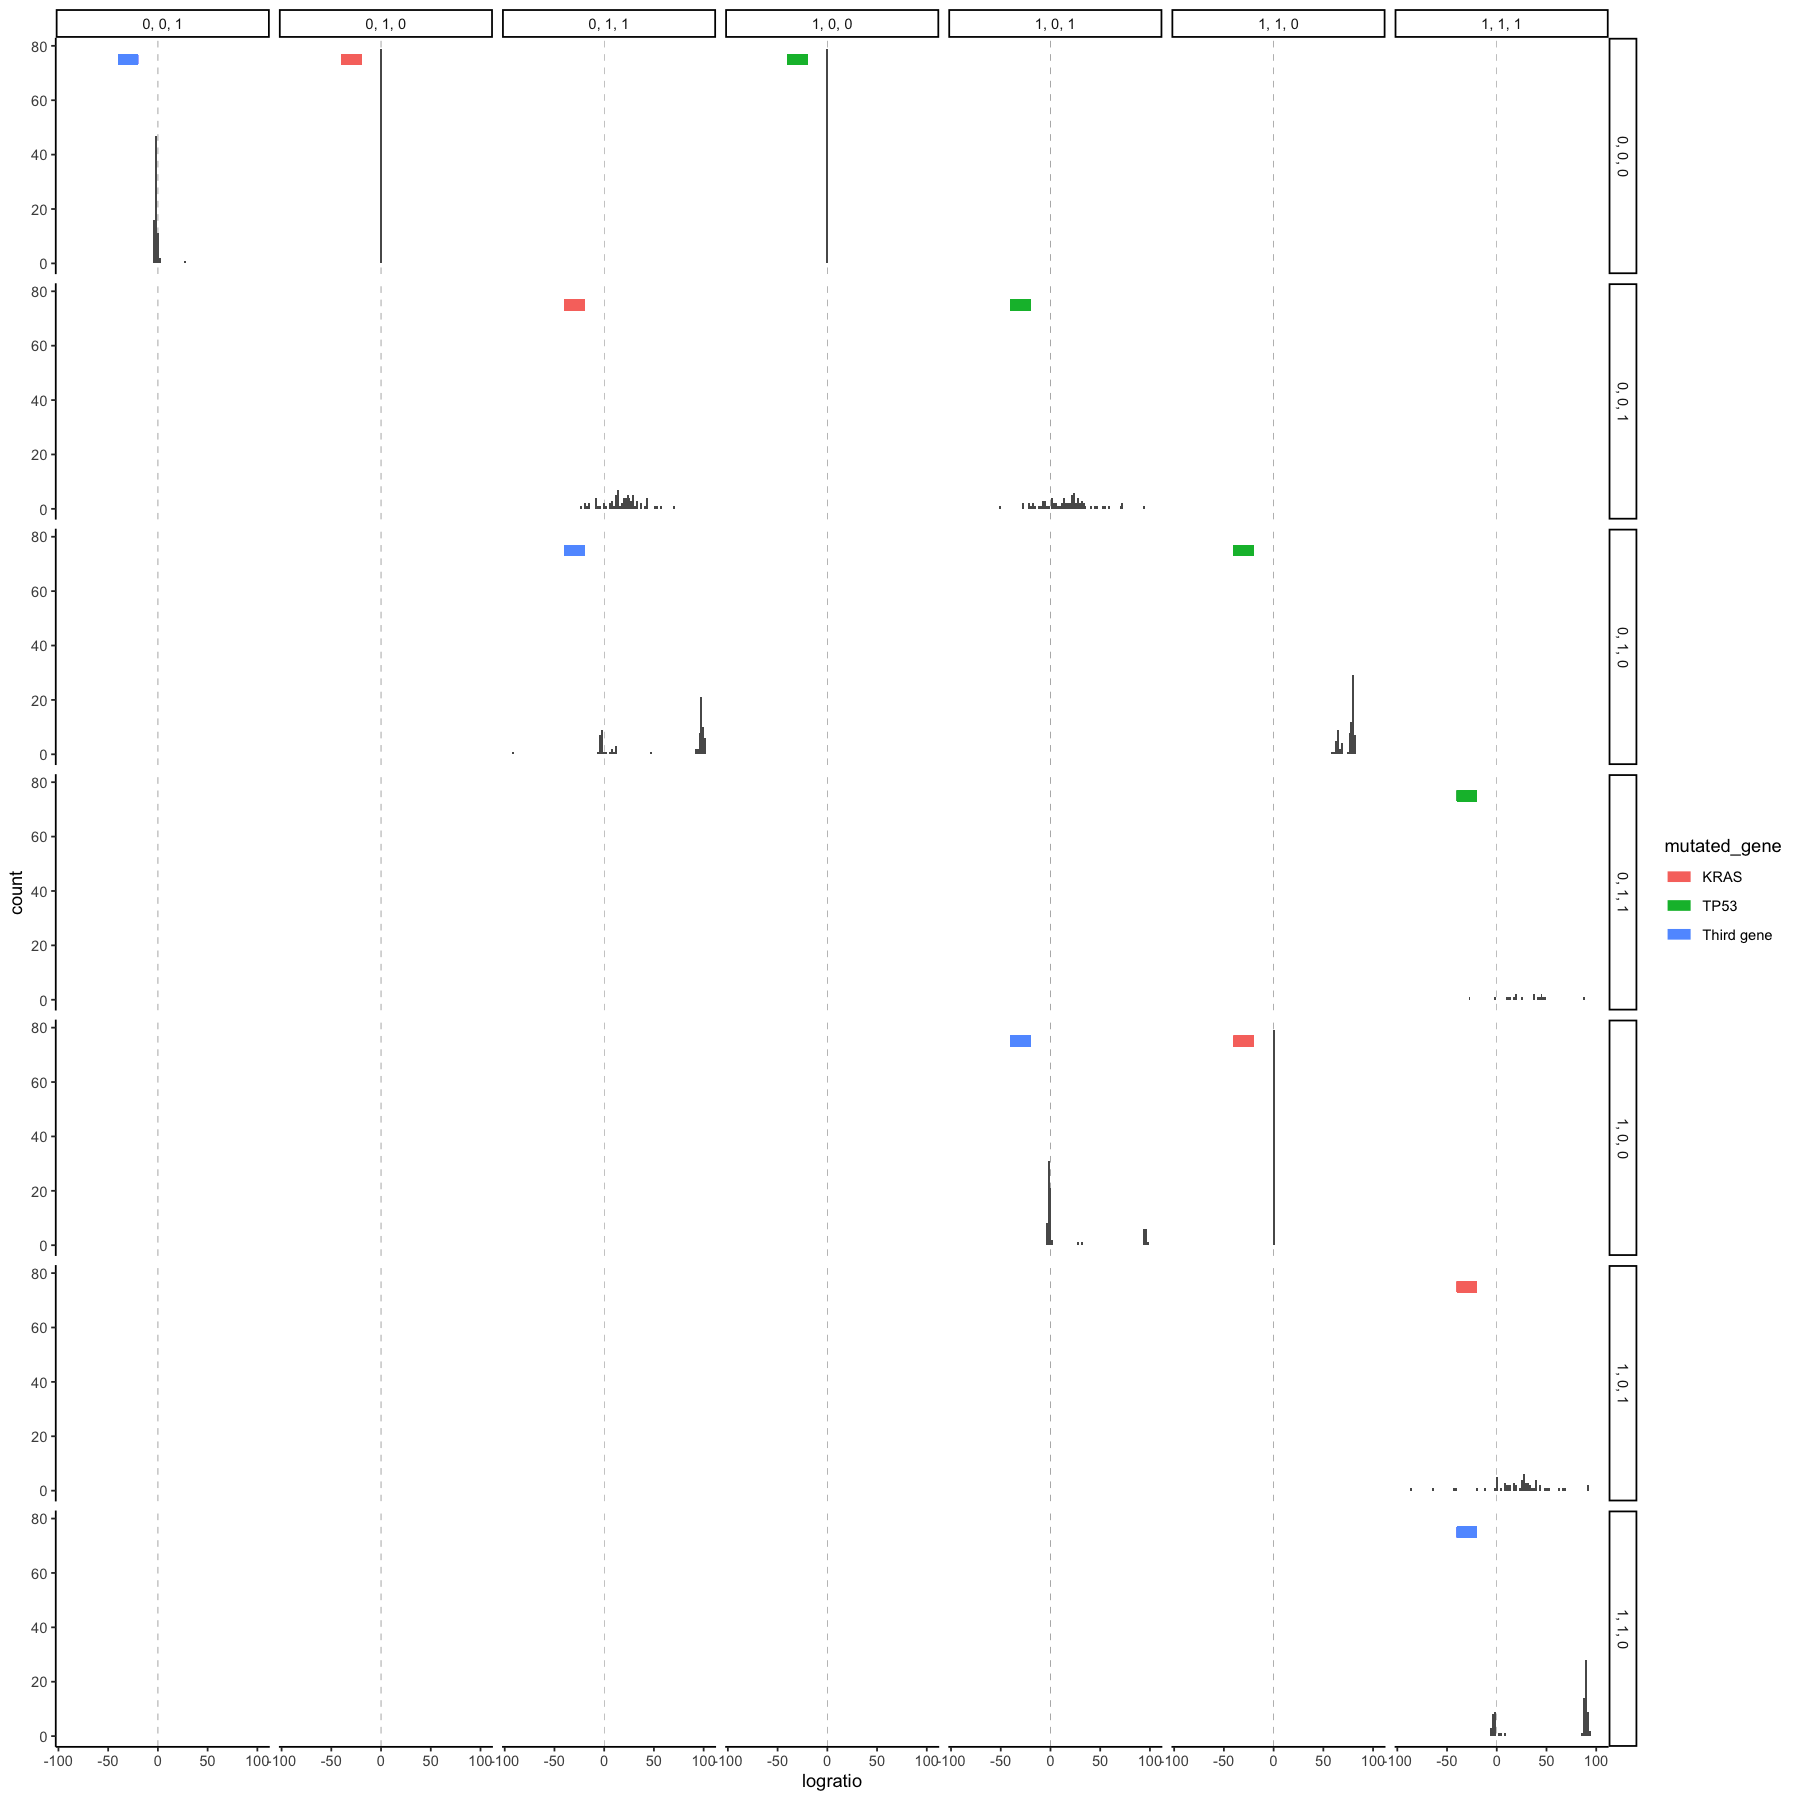

In [383]:
options(repr.plot.width = 15, repr.plot.height = 15)

gammas_df %>%
    filter(method=="variant") %>%
    filter(key!="pan_data") %>%
    #filter(gene %in% (gammas_df %>% pull(gene) %>% unique %>% sample(10))) %>% 
    pivot_wider(
        names_from = key,
        values_from  = c(gamma_mle, gamma_ci_low, gamma_ci_high)
    ) %>%
    mutate(s_ns_diff = gamma_mle_smoking-gamma_mle_nonsmoking,
            #logdiff = log(gamma_mle_smoking-gamma_mle_nonsmoking),
            logratio = log(gamma_mle_smoking/gamma_mle_nonsmoking)) %>%
    mutate(from = stringr::str_extract(mutation, "\\d, \\d, \\d(?=\\), )"),
           to = stringr::str_extract(mutation, "(?<=, \\()\\d, \\d, \\d"),
           mutated_gene = as.character(unlist(lapply(mutation, find_mutated_gene)))) %>%
    mutate(mutated_gene = ifelse(mutated_gene == 1, "TP53", ifelse(mutated_gene == 2, "KRAS", "Third gene"))) %>%
    ggplot(aes(x=logratio)) +
        #geom_density(bw=1e-1) +
        geom_vline(xintercept = 0, linetype="dashed", linewidth=0.1) +
        geom_histogram(bins = 100) + 
        geom_segment(aes(color=mutated_gene), y=75, yend=75, x=-40, xend=-20, linewidth=3) +
        # geom_rect(aes(color=mutated_gene),xmin = -Inf,xmax = Inf,
        #     ymin = -Inf,ymax = Inf,fill=NA, linewidth=3) + 
        facet_grid(rows=vars(from),cols=vars(to)) + theme_classic()
        #facet_wrap(~mutation) + theme_classic()

Warning message:
"Removed 107 rows containing non-finite values (`stat_density()`)."


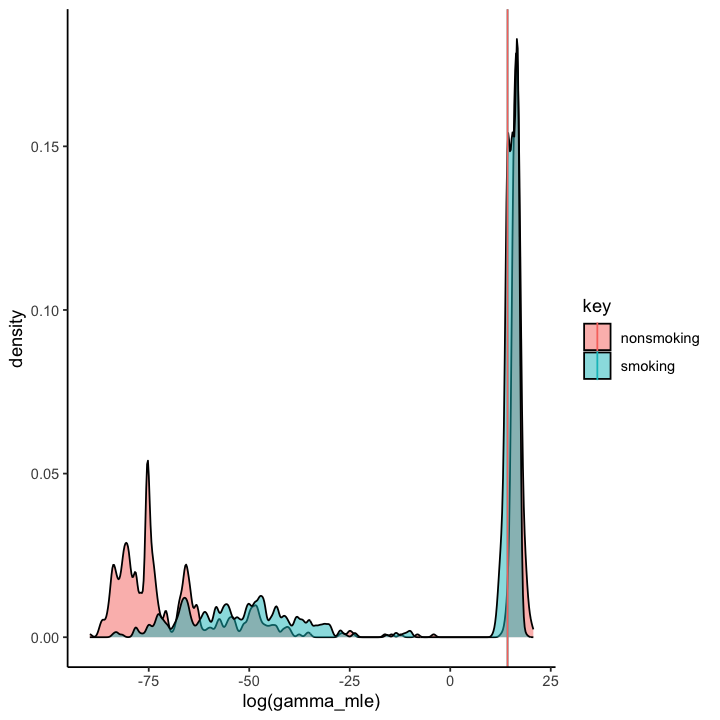

In [468]:
options(repr.plot.width = 6, repr.plot.height = 6)

gammas_df %>%
    filter(method=="variant") %>%
    filter(key!="pan_data") %>%
    mutate(from = stringr::str_extract(mutation, "\\d, \\d, \\d(?=\\), )"),
           to = stringr::str_extract(mutation, "(?<=, \\()\\d, \\d, \\d"),
           mutated_gene = as.character(unlist(lapply(mutation, find_mutated_gene)))) %>%
    ggplot(aes(x = log(gamma_mle))) + 
        geom_density(aes(fill=key), alpha=0.5, bw=5e-1) + 
        geom_vline(aes(xintercept=median(log(gamma_mle), na.rm=TRUE), color=key)) +
        #geom_vline()
        #geom_vline(aes(xintercept = median(log(gamma_mle)), color="red")) +
        theme_classic()

In [456]:
gammas_df %>%
    filter(method=="variant") %>%
    filter(key!="pan_data") %>%
    group_by(key) %>%
    summarize(avg = mean(gamma_mle, na.rm=TRUE),
                median = median(log(gamma_mle),na.rm=TRUE))

key,avg,median
<chr>,<dbl>,<dbl>
nonsmoking,15278085,-35.00016
smoking,6272467,14.33963


Warning message:
"Removed 107 rows containing non-finite values (`stat_density()`)."


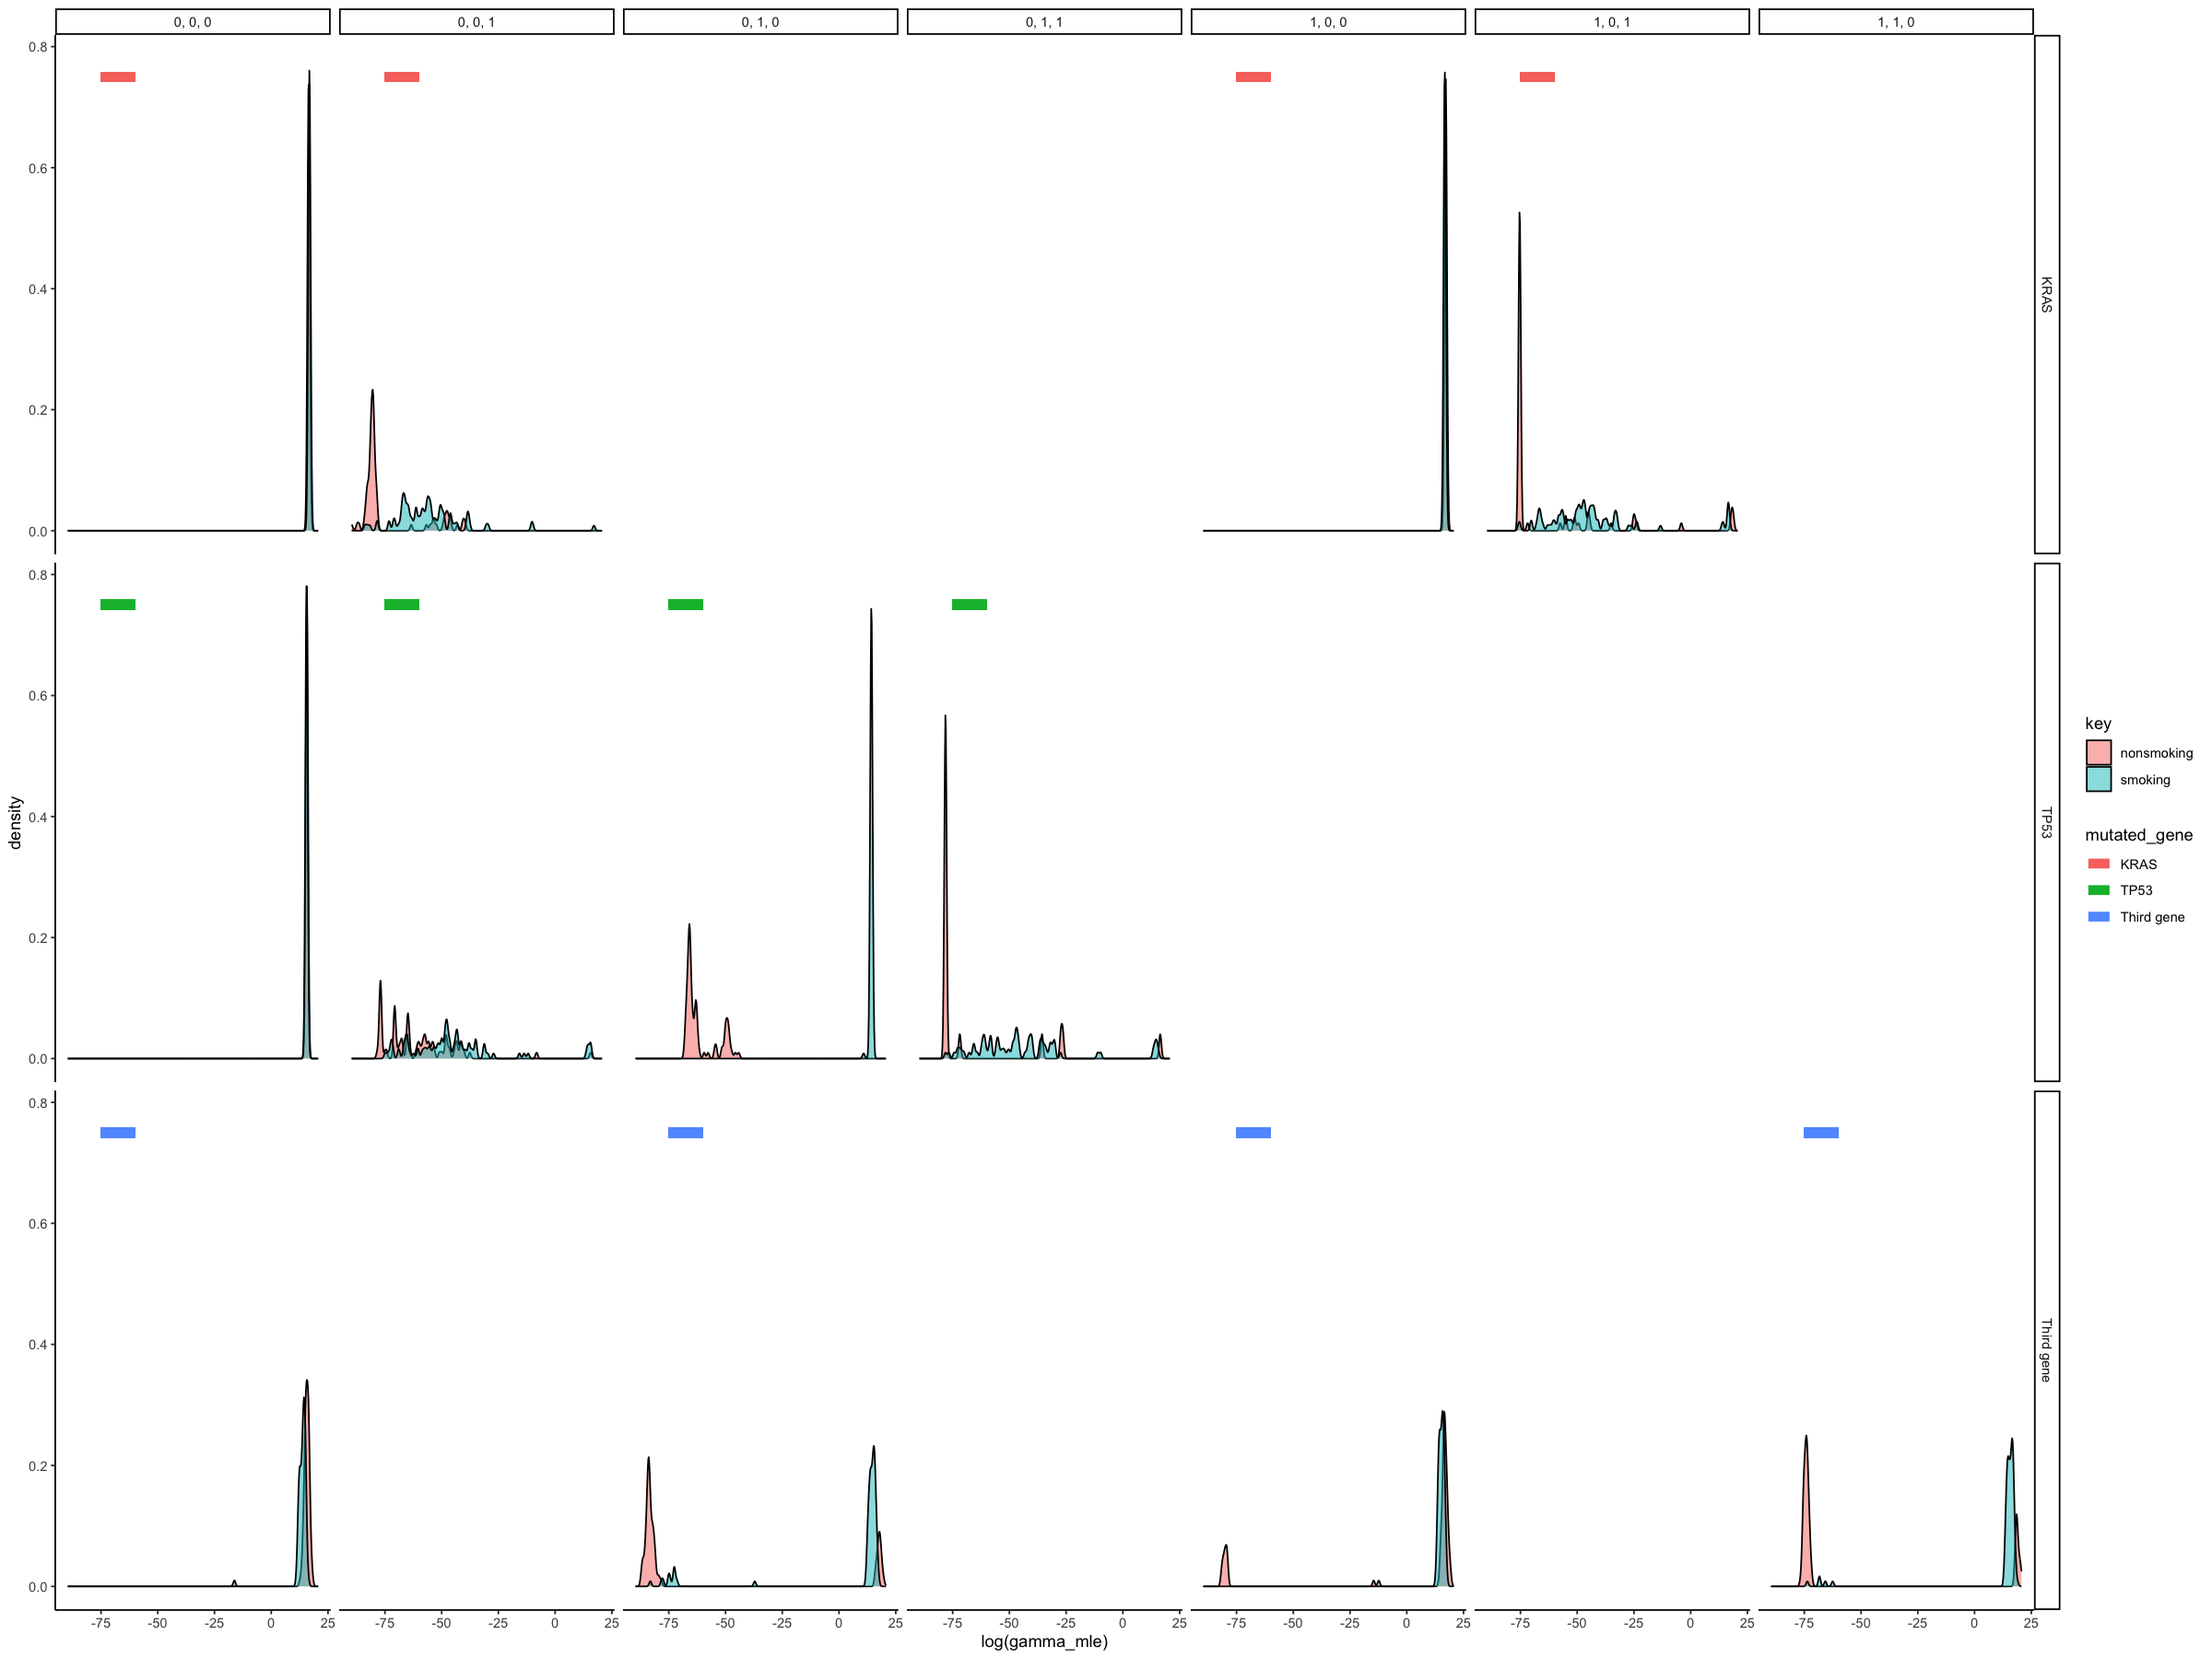

In [391]:
options(repr.plot.width = 20, repr.plot.height = 15)

gammas_df %>%
    filter(method=="variant") %>%
    filter(key!="pan_data") %>%
    mutate(from = stringr::str_extract(mutation, "\\d, \\d, \\d(?=\\), )"),
           to = stringr::str_extract(mutation, "(?<=, \\()\\d, \\d, \\d"),
           mutated_gene = as.character(unlist(lapply(mutation, find_mutated_gene)))) %>%
    mutate(mutated_gene = ifelse(mutated_gene == 1, "TP53", ifelse(mutated_gene == 2, "KRAS", "Third gene"))) %>%
    ggplot(aes(x = log(gamma_mle))) + 
        geom_density(aes(fill=key), alpha=0.5, bw=5e-1) +
        geom_segment(aes(color=mutated_gene), y=0.75, yend=0.75, x=-75, xend=-60, linewidth=3) +
        # geom_rect(aes(color=mutated_gene),xmin = -Inf,xmax = Inf,
        #     ymin = -Inf,ymax = Inf,fill=NA, linewidth=3) + 
        #facet_grid(rows=vars(from),cols=vars(to)) + theme_classic()
        facet_grid(rows=vars(mutated_gene),cols=vars(from)) +
        theme_classic()
        #facet_wrap(~mutation) + theme_classic()
        #facet_grid(cols=vars(mutation), rows=vars(mutated_gene)) + theme_classic()
        #geom_density(aes(fill=paste0(key,"_",mutation)), alpha=0.5, bw=5e-1)

Warning message:
"Removed 107 rows containing non-finite values (`stat_density()`)."


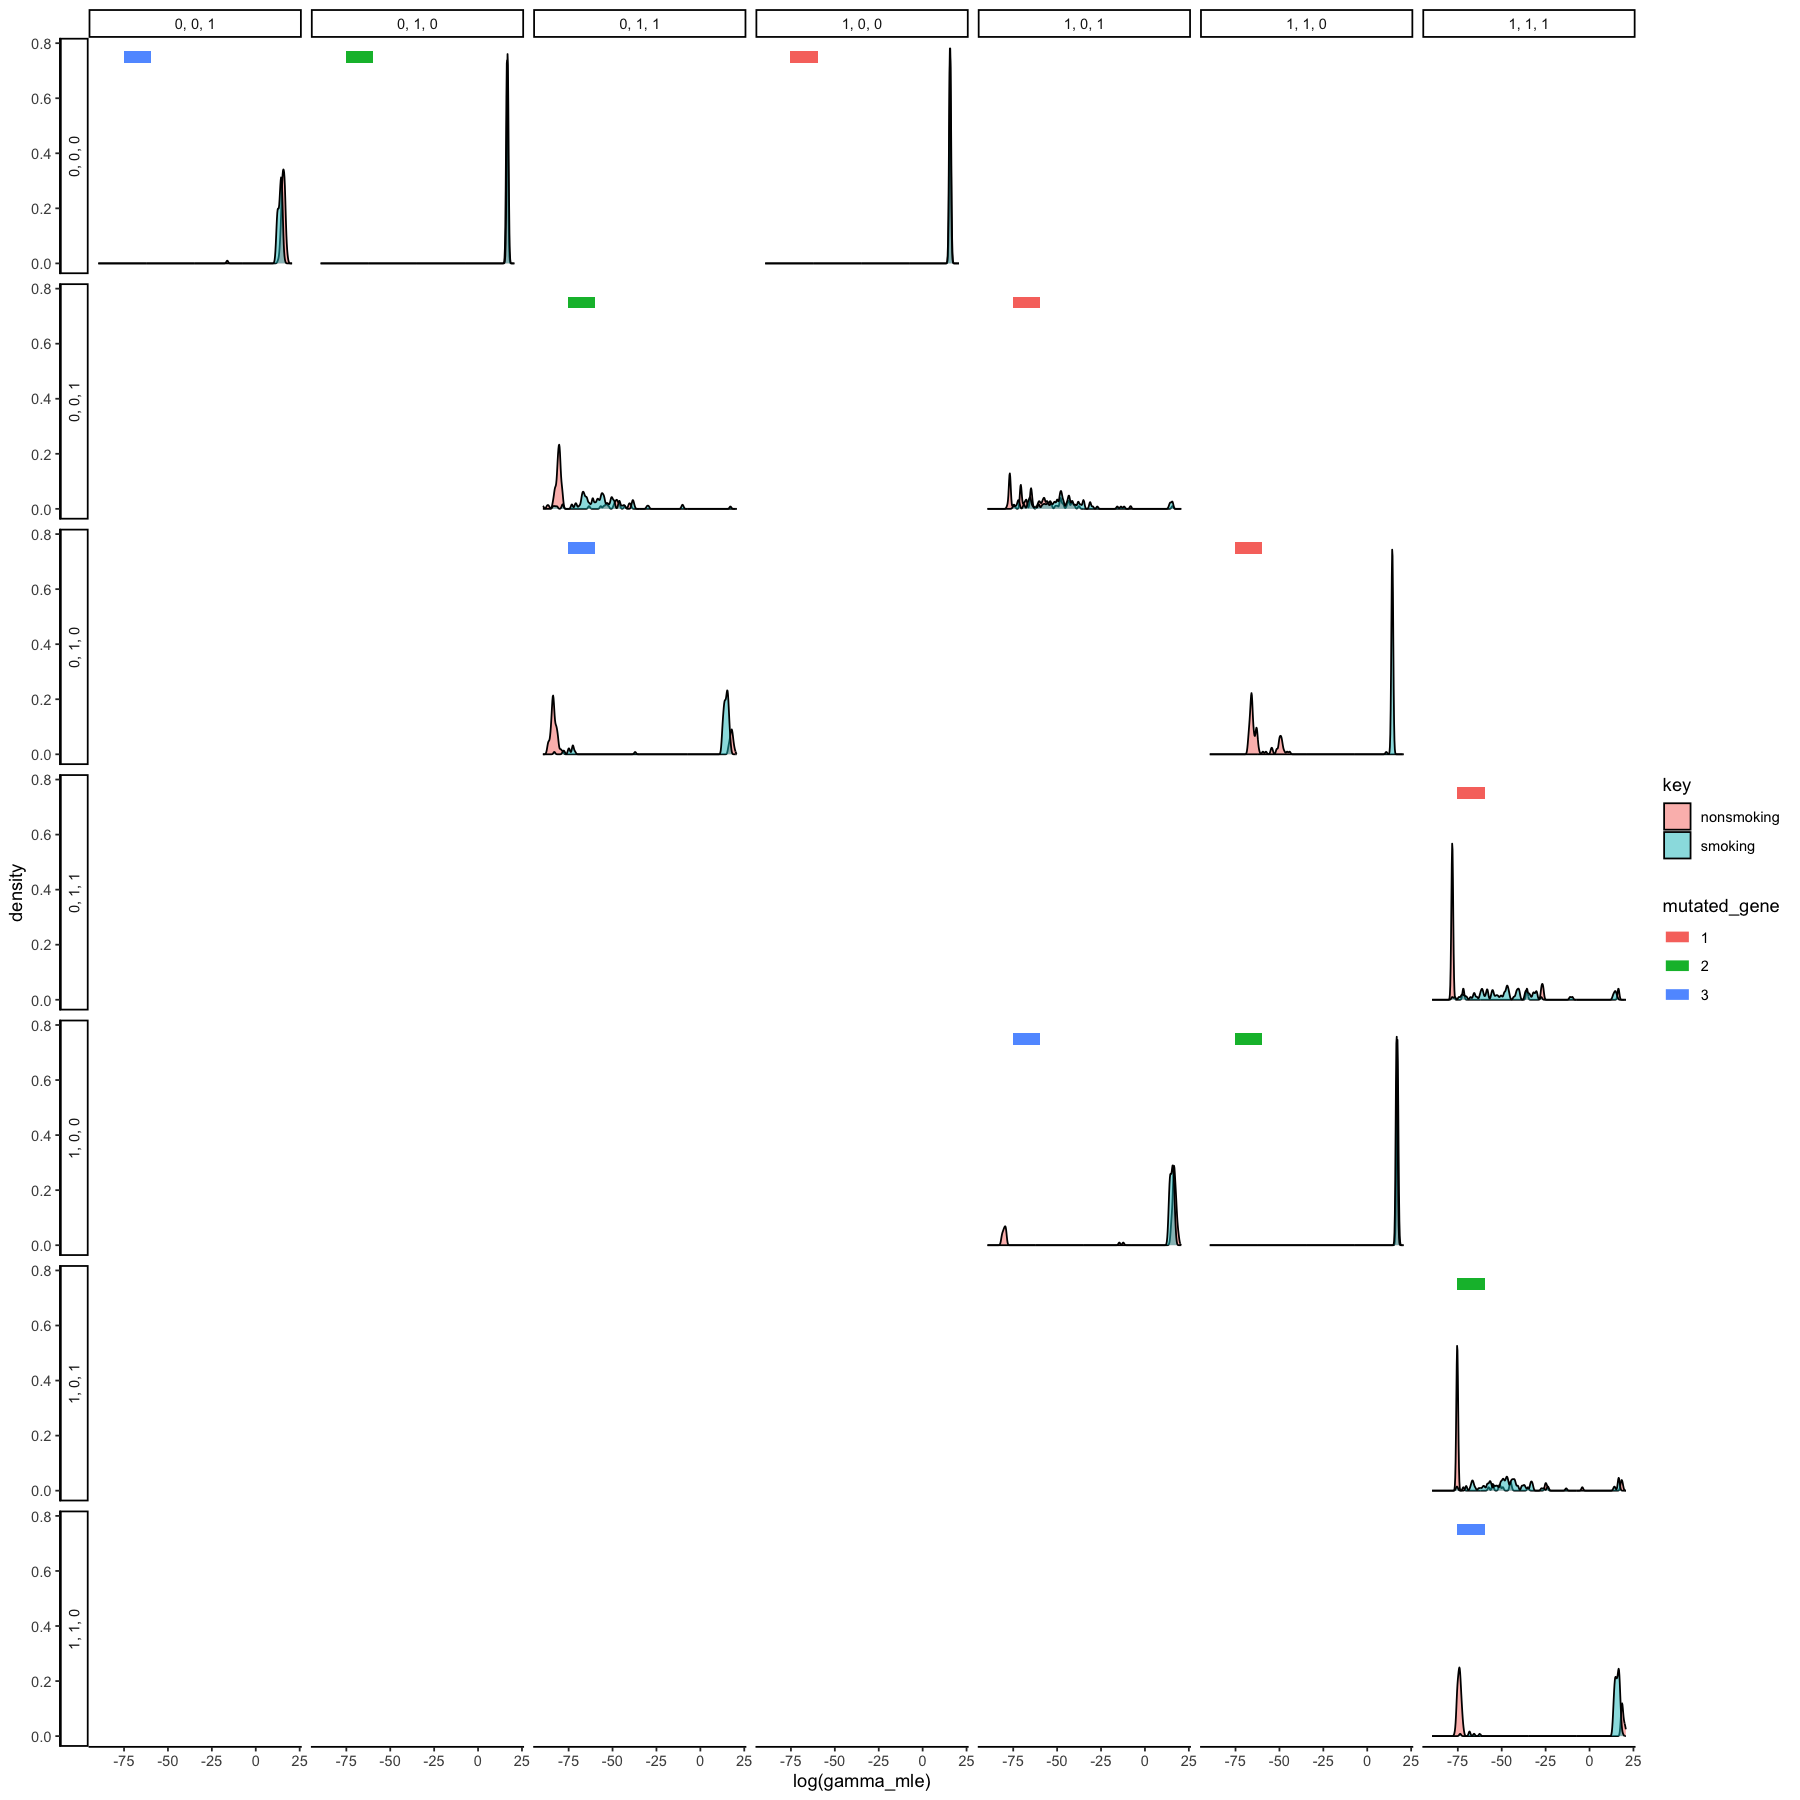

In [392]:
options(repr.plot.width = 15, repr.plot.height = 15)

gammas_df %>%
    filter(method=="variant") %>%
    filter(key!="pan_data") %>%
    mutate(from = stringr::str_extract(mutation, "\\d, \\d, \\d(?=\\), )"),
           to = stringr::str_extract(mutation, "(?<=, \\()\\d, \\d, \\d"),
           mutated_gene = as.character(unlist(lapply(mutation, find_mutated_gene)))) %>%
    ggplot(aes(x = log(gamma_mle))) + 
        geom_density(aes(fill=key), alpha=0.5, bw=5e-1) +
        geom_segment(aes(color=mutated_gene), y=0.75, yend=0.75, x=-75, xend=-60, linewidth=3) +
        # geom_rect(aes(color=mutated_gene),xmin = -Inf,xmax = Inf,
        #     ymin = -Inf,ymax = Inf,fill=NA, linewidth=3) + 
        facet_grid(rows=vars(from),cols=vars(to),
                    switch="y") + 
        theme_classic()
        #facet_wrap(~mutation) + theme_classic()
        #facet_grid(cols=vars(mutation), rows=vars(mutated_gene)) + theme_classic()
        #geom_density(aes(fill=paste0(key,"_",mutation)), alpha=0.5, bw=5e-1)

Warning message:
"Removed 107 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 107 rows containing missing values (`geom_text()`)."


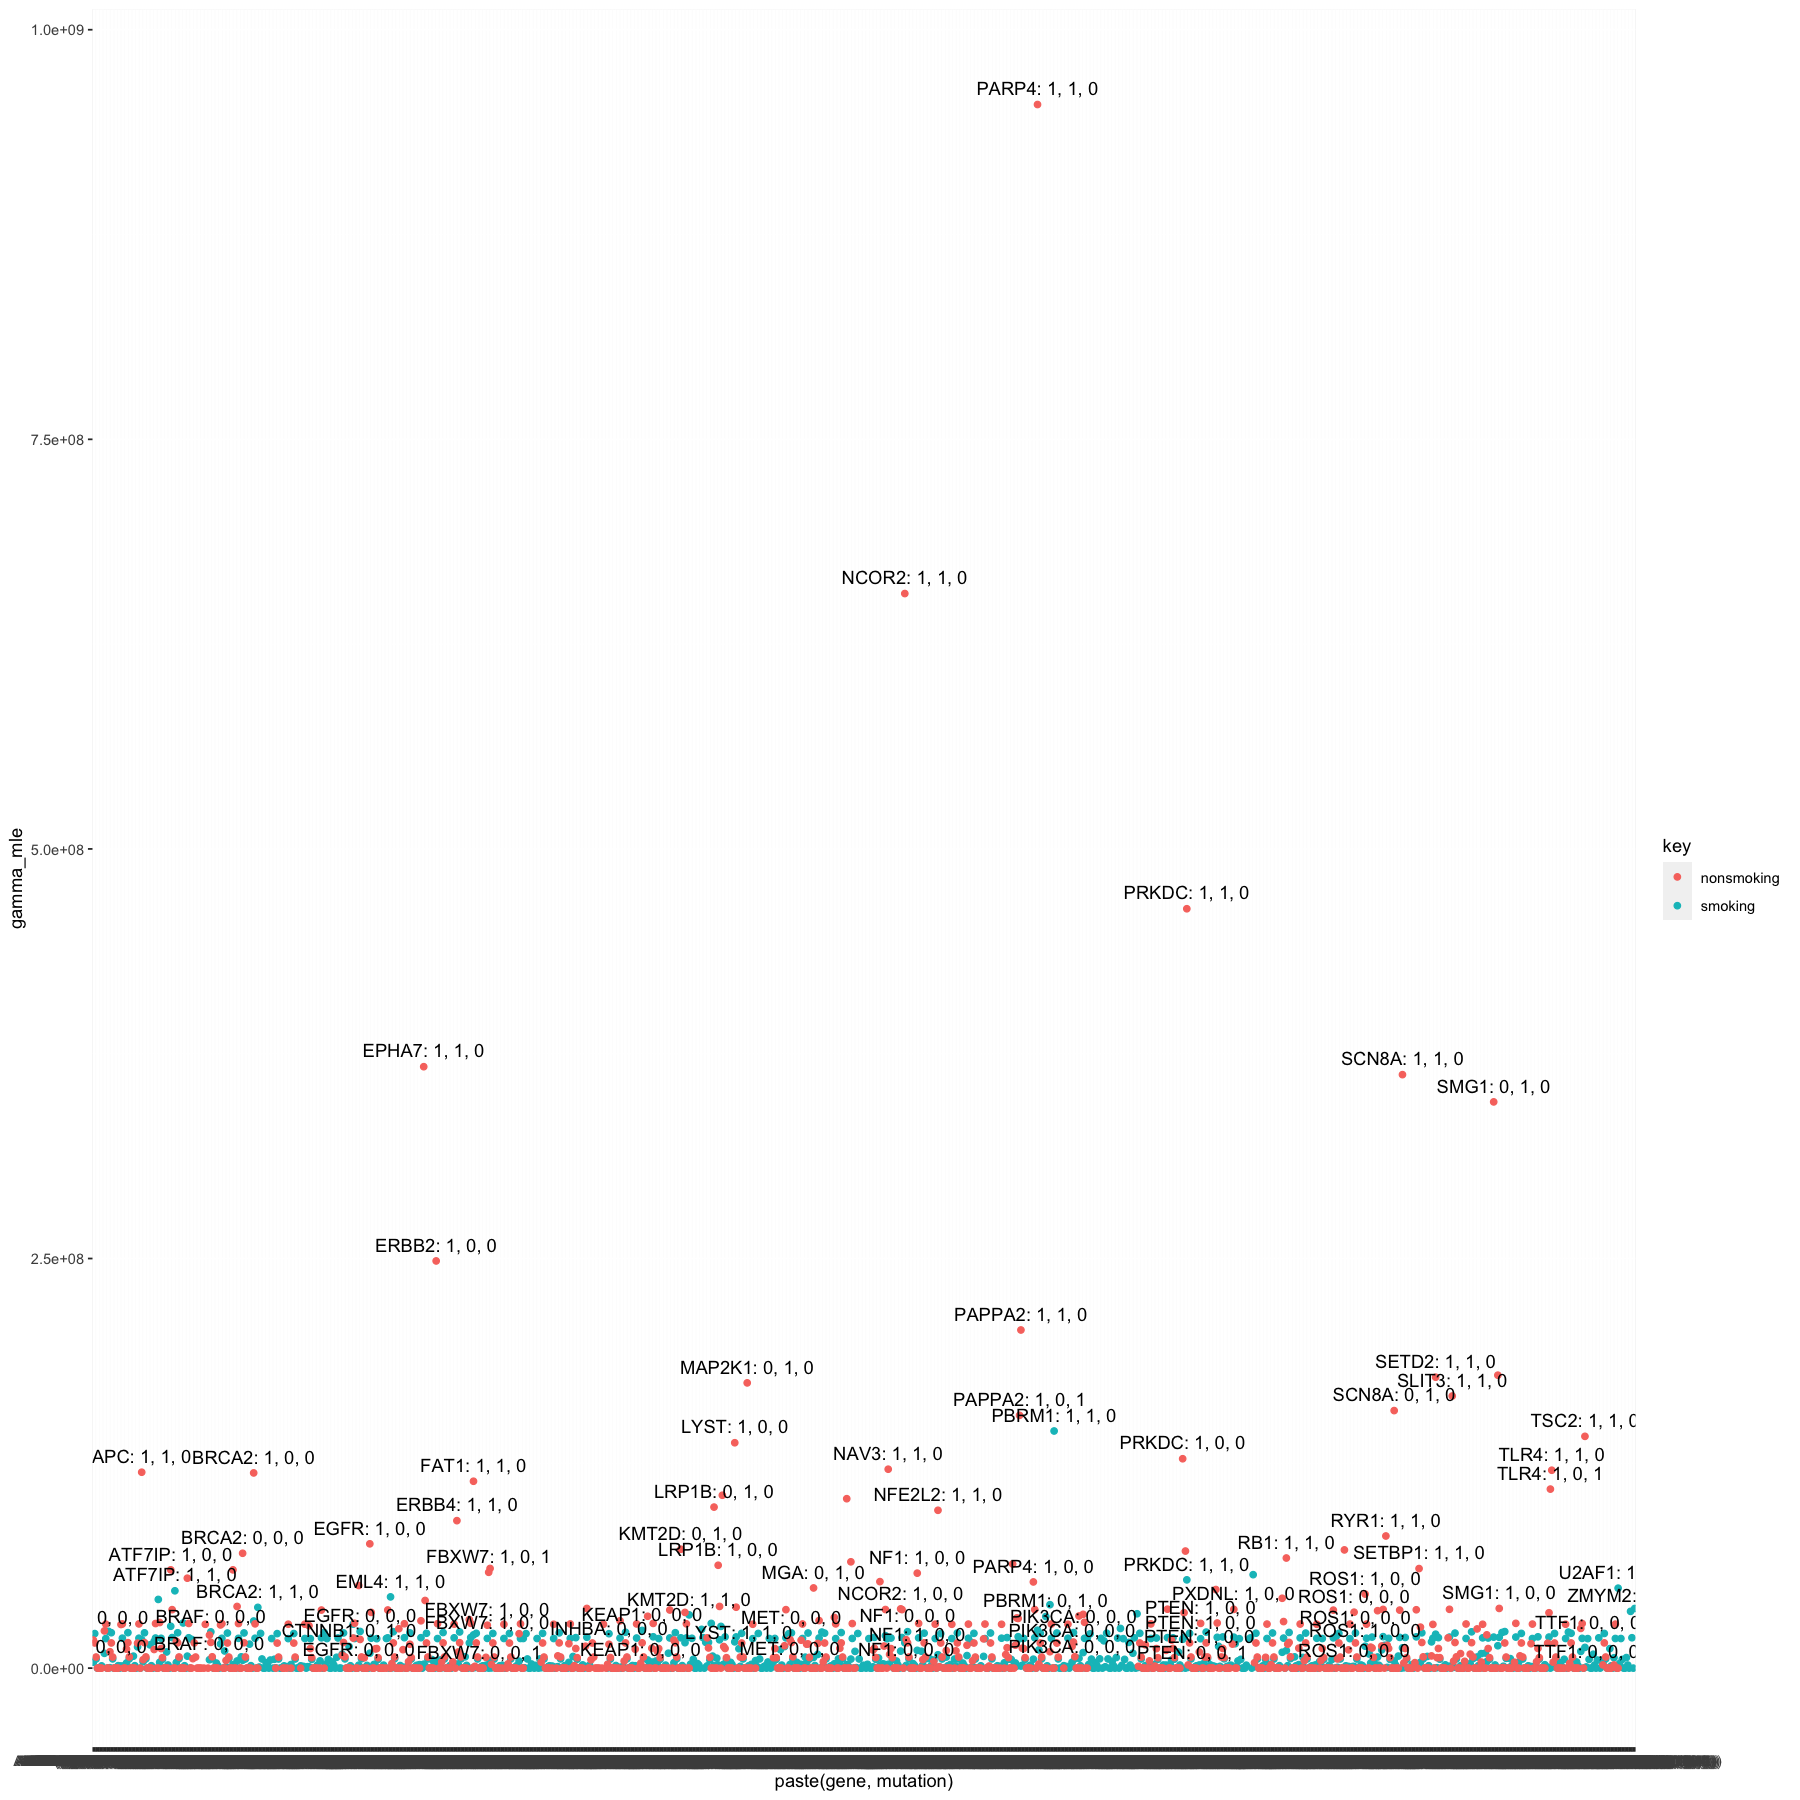

In [408]:
gammas_df %>%
    filter(method=="variant") %>%
    filter(key!="pan_data") %>%
    mutate(from = stringr::str_extract(mutation, "\\d, \\d, \\d(?=\\), )"),
           to = stringr::str_extract(mutation, "(?<=, \\()\\d, \\d, \\d"),
           mutated_gene = as.character(unlist(lapply(mutation, find_mutated_gene)))) %>%
    ggplot(aes(x=paste(gene,mutation),y=gamma_mle)) + 
        geom_point(aes(color=key)) +
        geom_text(aes(label = glue("{gene}: {from}")),
                    nudge_y = 1e7,
                    check_overlap = TRUE) +
        #scale_y_log10() + 
        theme()

Warning message:
"Removed 12 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 12 rows containing missing values (`geom_text()`)."


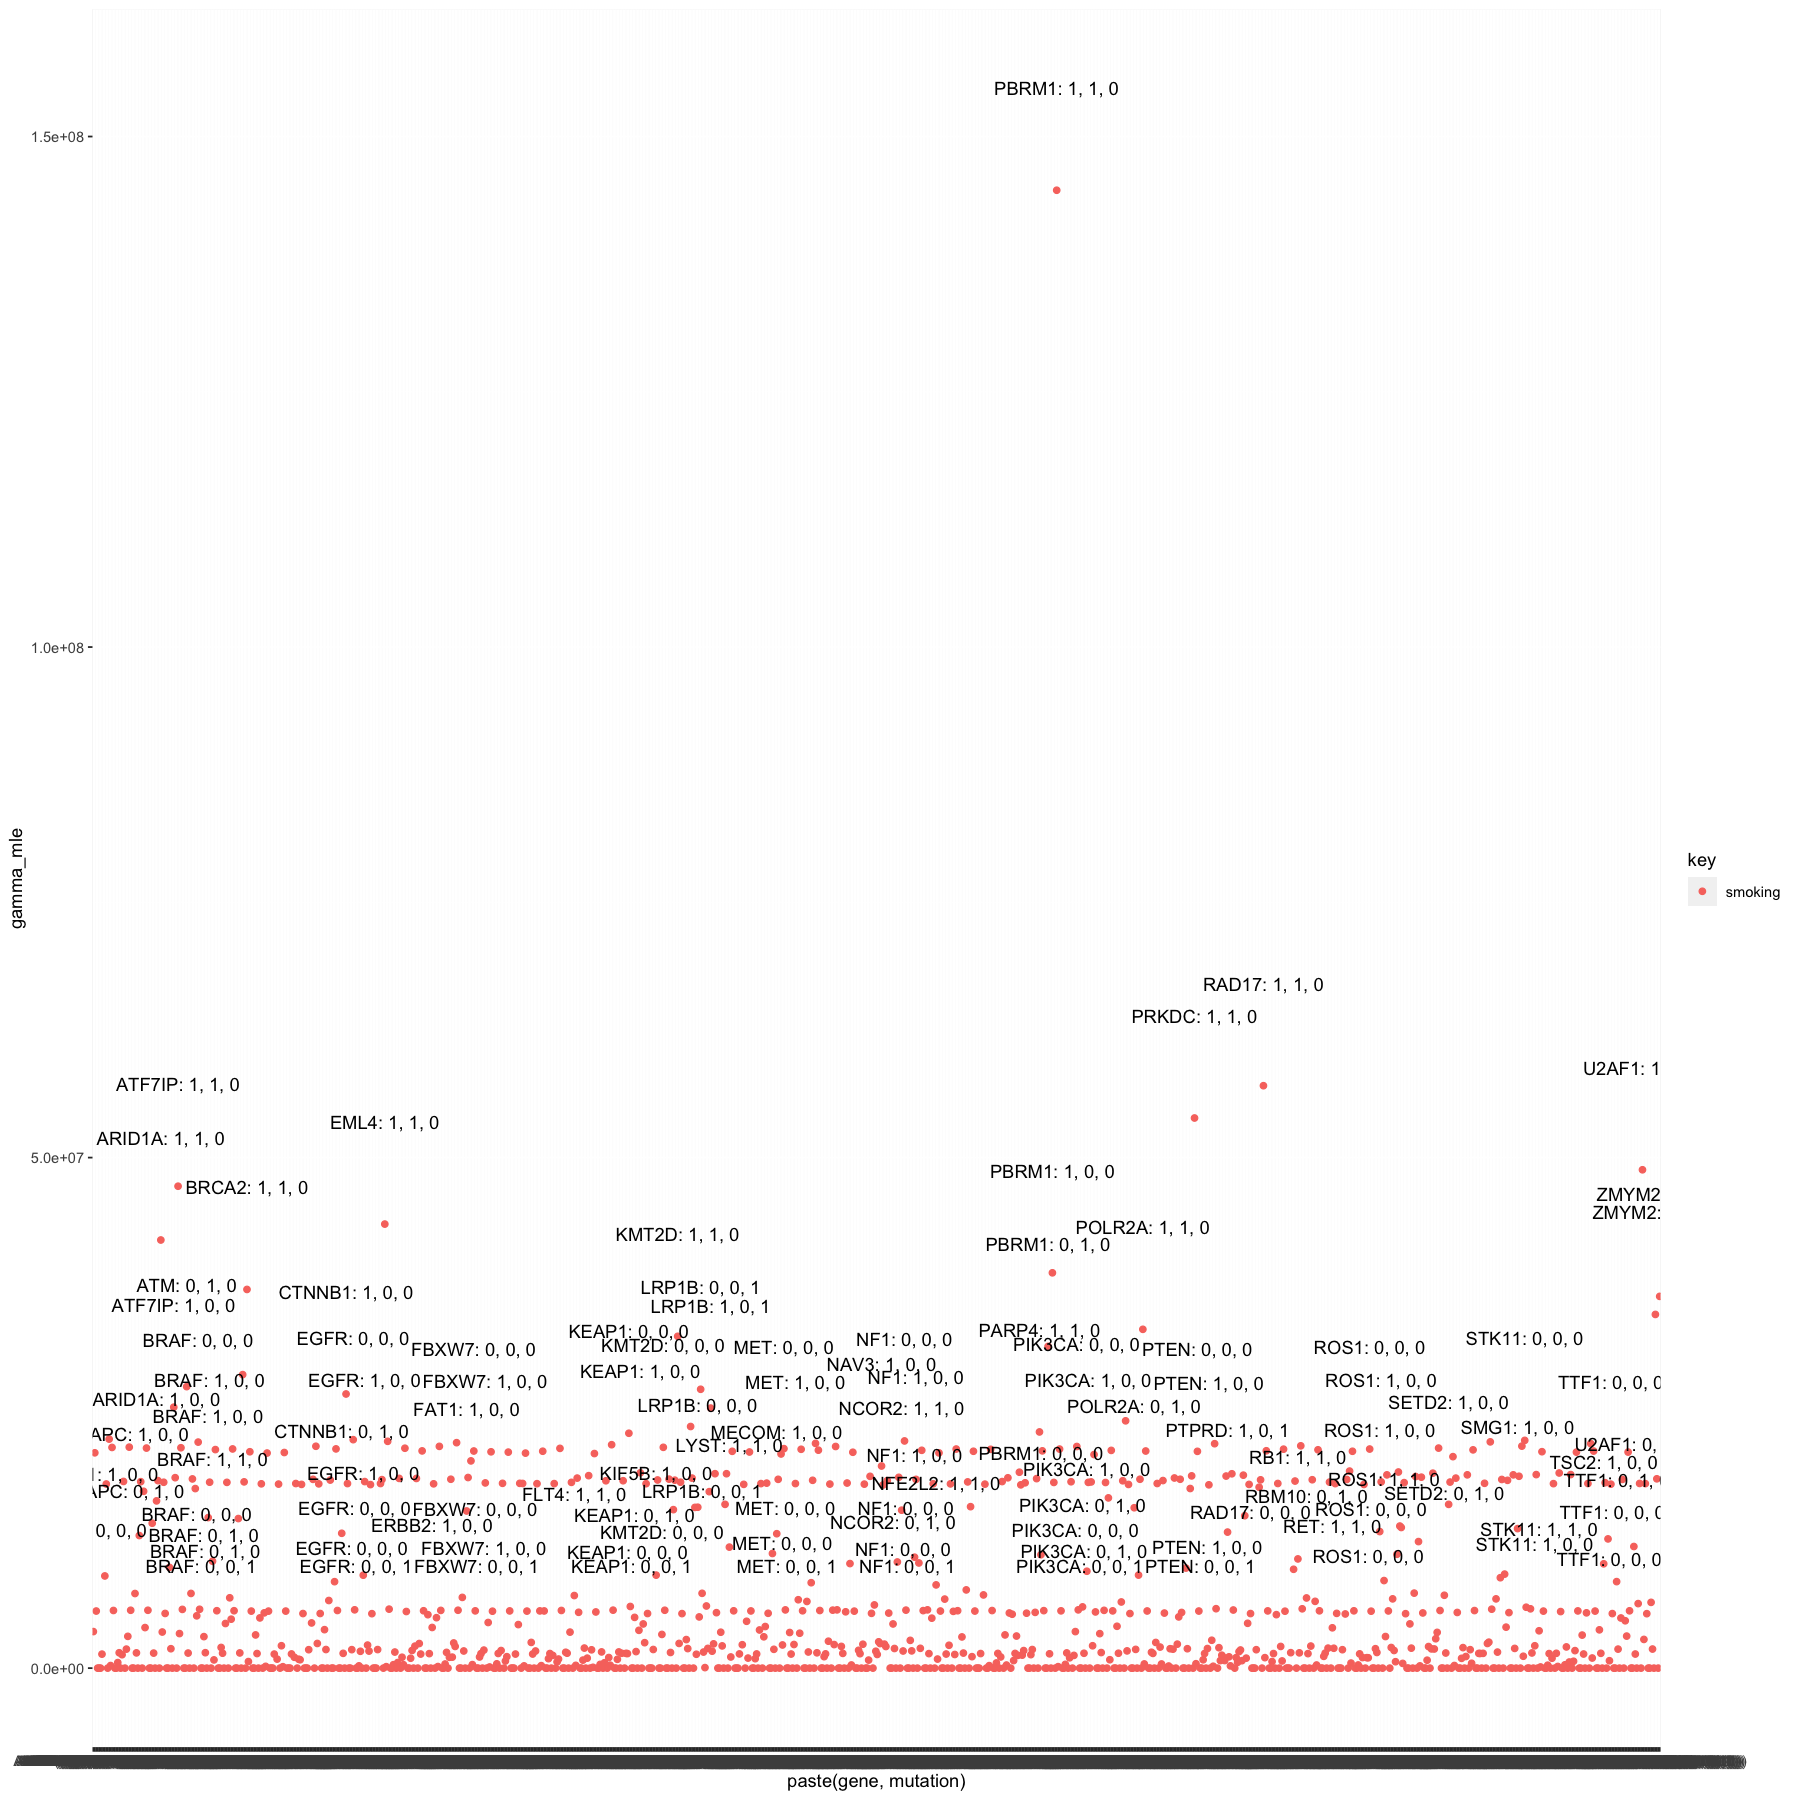

In [420]:
gammas_df %>%
    filter(method=="variant") %>%
    filter(key=="smoking") %>%
    mutate(from = stringr::str_extract(mutation, "\\d, \\d, \\d(?=\\), )"),
           to = stringr::str_extract(mutation, "(?<=, \\()\\d, \\d, \\d"),
           mutated_gene = as.character(unlist(lapply(mutation, find_mutated_gene)))) %>%
    ggplot(aes(x=paste(gene,mutation),y=gamma_mle)) + 
        geom_point(aes(color=key)) +
        geom_text(aes(label = glue("{gene}: {from}")),
                    nudge_y = 1e7,
                    check_overlap = TRUE) +
        #scale_y_log10() + 
        theme()

In [452]:
gammas_df %>%
    filter(method=="variant") %>%
    filter(key!="pan_data") %>%
    mutate(from = stringr::str_extract(mutation, "\\d, \\d, \\d(?=\\), )"),
           to = stringr::str_extract(mutation, "(?<=, \\()\\d, \\d, \\d"),
           mutated_gene = as.character(unlist(lapply(mutation, find_mutated_gene)))) %>%
    mutate(mutated_gene = ifelse(mutated_gene == 1, "TP53", ifelse(mutated_gene == 2, "KRAS", "Third gene"))) %>%
    left_join(samples_per_combination, by=c("key"="key", "gene"="third gene", 
                                          "from"="state")) %>%
       rename(from_count = count) %>%
    left_join(samples_per_combination, by=c("key"="key", "gene"="third gene", 
                                          "to"="state")) %>%
       rename(to_count = count)


method,key,gene,mutation,gamma_mle,gamma_ci_low,gamma_ci_high,from,to,mutated_gene,from_count,to_count
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>
variant,smoking,EGFR,"((0, 0, 0), (0, 0, 1))",1.809718e+06,1.227503e+06,2.553068e+06,"0, 0, 0","0, 0, 1",Third gene,284,29
variant,smoking,EGFR,"((0, 0, 0), (0, 1, 0))",2.237503e+07,1.974937e+07,2.523114e+07,"0, 0, 0","0, 1, 0",KRAS,284,259
variant,smoking,EGFR,"((0, 0, 1), (0, 1, 1))",3.892239e-37,3.892239e-37,8.586004e+06,"0, 0, 1","0, 1, 1",KRAS,29,1
variant,smoking,EGFR,"((0, 1, 0), (0, 1, 1))",2.227617e+05,1.270466e+04,9.823715e+05,"0, 1, 0","0, 1, 1",Third gene,259,1
variant,smoking,EGFR,"((0, 0, 0), (1, 0, 0))",5.710798e+06,5.170883e+06,6.288152e+06,"0, 0, 0","1, 0, 0",TP53,284,316
variant,smoking,EGFR,"((0, 0, 1), (1, 0, 1))",9.066154e-16,9.066154e-16,4.070897e+06,"0, 0, 1","1, 0, 1",TP53,29,55
variant,smoking,EGFR,"((1, 0, 0), (1, 0, 1))",9.101386e+06,6.868976e+06,1.179435e+07,"1, 0, 0","1, 0, 1",Third gene,316,55
variant,smoking,EGFR,"((0, 1, 0), (1, 1, 0))",1.648374e+06,8.334441e+05,2.579003e+06,"0, 1, 0","1, 1, 0",TP53,259,126
variant,smoking,EGFR,"((1, 0, 0), (1, 1, 0))",1.827024e+07,1.414423e+07,2.297428e+07,"1, 0, 0","1, 1, 0",KRAS,316,126


In [441]:
s_plus_spc = fread("../../output/samples_per_combination_smoking_plus.csv")
ns_plus_spc = fread("../../output/samples_per_combination_nonsmoking_plus.csv")

s_plus_spc = s_plus_spc %>% 
                pivot_longer(cols=starts_with("("),
                                names_to = "state",
                                values_to = "count") %>%
                mutate(state = gsub("[()]","",state)) %>% 
                mutate(key = "smoking")

ns_plus_spc = ns_plus_spc %>% 
                pivot_longer(cols=starts_with("("),
                                names_to = "state",
                                values_to = "count") %>%
                mutate(state = gsub("[()]","",state)) %>%
                mutate(key = "nonsmoking")

samples_per_combination = bind_rows(s_plus_spc, ns_plus_spc)

In [442]:
samples_per_combination

third gene,state,count,key
<chr>,<chr>,<int>,<chr>
EGFR,"0, 0, 0",284,smoking
EGFR,"0, 0, 1",29,smoking
EGFR,"0, 1, 0",259,smoking
EGFR,"0, 1, 1",1,smoking
EGFR,"1, 0, 0",316,smoking
EGFR,"1, 0, 1",55,smoking
EGFR,"1, 1, 0",126,smoking
EGFR,"1, 1, 1",3,smoking
EML4,"0, 0, 0",221,smoking


In [439]:
s_plus_spc %>% mutate(key = "smoking")

third gene,state,count,key
<chr>,<chr>,<int>,<chr>
EGFR,"0, 0, 0",284,smoking
EGFR,"0, 0, 1",29,smoking
EGFR,"0, 1, 0",259,smoking
EGFR,"0, 1, 1",1,smoking
EGFR,"1, 0, 0",316,smoking
EGFR,"1, 0, 1",55,smoking
EGFR,"1, 1, 0",126,smoking
EGFR,"1, 1, 1",3,smoking
EML4,"0, 0, 0",221,smoking


In [373]:
library(cancereffectsizeR)

ERROR: Error in ces_variant(): cesa should be a CESAnalysis.


In [374]:
View(ces_variant)

function (cesa = NULL, variants = select_variants(cesa, min_freq = 2), 
    samples = character(), model = "default", run_name = "auto", 
    ordering_col = NULL, ordering = NULL, lik_args = list(), 
    hold_out_same_gene_samples = "auto", groups = NULL, cores = 1, 
    conf = 0.95) 
{
    if (!is(cesa, "CESAnalysis")) {
        stop("cesa should be a CESAnalysis.")
    }
    if (length(hold_out_same_gene_samples) == 1) {
        if (!is.logical(hold_out_same_gene_samples)) {
            if (identical(hold_out_same_gene_samples, "auto")) {
                hold_out_same_gene_samples = is(variants, "data.table")
            }
            else {
                stop("hold_out_same_gene_samples should be TRUE/FALSE or left \"auto\".")
            }
        }
    }
    else {
        stop("hold_out_same_gene_samples should be TRUE/FALSE or left \"auto\".")
    }
    if (!is(run_name, "character") || length(run_name) != 1) {
        stop("run_name should be 1-length character")
    }
    if (run_name %in% names(cesa@selection_results)) {
        stop("The run_name you chose has already been used. Please pick a new one.")
    }
    if (!grepl("^[a-z]", tolower(run_name), perl = T) || grepl("\\s\\s", 
        run_name)) {
        stop("Invalid run name. The name must start with a latter and contain no consecutive spaces.")
    }
    if (run_name == "auto") {
        run_number = length(cesa@selection_results) + 1
        run_name = paste0("selection.", run_number)
        while (run_name %in% names(cesa@selection_results)) {
            run_number = run_number + 1
            run_name = paste0("variant_effects_", run_number)
        }
    }
    if (is(model, "character")) {
        model = tolower(model)
        model[model %in% c("sswm", "default")] = "basic"
        model[model %like% "sswm[-_]sequential"] = "sequential"
        if (length(model) != 1 || !model %in% c("basic", "sequential")) {
            stop("model should specify a built-in selection model (i.e., \"default\") or a custom function factory.")
        }
        else {
            if (model == "basic") {
                lik_factory = sswm_lik
            }
            else if (model == "sequential") {
                lik_factory = sswm_sequential_lik
            }
            else {
                stop("Unrecognized model")
            }
        }
    }
    else if (!is(model, "function")) {
        stop("model should specify a built-in selection model (\"default\") or a custom function factory.")
    }
    else {
        lik_factory = model
    }
    if (!is(lik_args, "list")) {
        stop("lik args should be named list")
    }
    if (length(lik_args) > 0 && is.character(model)) {
        if (model %in% c("basic", "sequential")) {
            stop("lik_args aren't used in the chosen model.")
        }
    }
    if (length(lik_args) != uniqueN(names(lik_args))) {
        stop("lik_args should be a named list without repeated names.")
    }
    if (is.null(ordering_col) && !is.null(ordering)) {
        stop("Use of ordering requires use of ordering_col")
    }
    if (!is.null(ordering_col) && !is.null(groups)) {
        stop("groups is deprecated; use ordering_col/ordering (see docs).")
    }
    samples = select_samples(cesa, samples)
    if (samples[, .N] < cesa@samples[, .N]) {
        num_excluded = cesa@samples[, .N] - samples[, .N]
        pretty_message(paste0("Note that ", num_excluded, " samples are being excluded from selection inference."))
    }
    if (!is.null(ordering_col)) {
        if (is.character(model) && model == "basic") {
            warning("You supplied an ordering_col, but it's not used in the default model.")
        }
        if (!is(ordering_col, "character")) {
            stop("ordering_col should be type character (a column name from CESAnalysis sample table).")
        }
        if (!ordering_col %in% names(cesa@samples)) {
            stop("Input ordering_col is not present in CESAnalysis sample table.")
        }
        if (is.

In [375]:
View(sswm_lik)

function (rates_tumors_with, rates_tumors_without) 
{
    fn = function(gamma) {
        gamma = unname(gamma)
        sum_log_lik = 0
        if (length(rates_tumors_without) > 0) {
            sum_log_lik = -1 * sum(gamma * rates_tumors_without)
        }
        if (length(rates_tumors_with) > 0) {
            sum_log_lik = sum_log_lik + sum(log(1 - exp(-1 * 
                gamma * rates_tumors_with)))
        }
        return(-1 * sum_log_lik)
    }
    formals(fn)[["gamma"]] = 1
    bbmle::parnames(fn) = "selection_intensity"
    return(fn)
}
<bytecode: 0x28313d890>
<environment: namespace:cancereffectsizeR>